In [8]:
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df1 = pd.read_csv('public_150k_plus_220703.csv')

In [5]:
df2 = pd.read_csv('public_up_to_150k_12_220703.csv')

In [6]:
df = pd.concat([df1,df2])

In [7]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [8]:
df.shape

(1568411, 53)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568411 entries, 0 to 599878
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   LoanNumber                   1568411 non-null  int64  
 1   DateApproved                 1568411 non-null  object 
 2   SBAOfficeCode                1568411 non-null  int64  
 3   ProcessingMethod             1568411 non-null  object 
 4   BorrowerName                 1568399 non-null  object 
 5   BorrowerAddress              1568391 non-null  object 
 6   BorrowerCity                 1568394 non-null  object 
 7   BorrowerState                1568398 non-null  object 
 8   BorrowerZip                  1568393 non-null  object 
 9   LoanStatusDate               1446434 non-null  object 
 10  LoanStatus                   1568411 non-null  object 
 11  Term                         1568411 non-null  int64  
 12  SBAGuarantyPercentage        1568411 non-nu

In [10]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'])
df['LoanStatusDate'] = pd.to_datetime(df['LoanStatusDate'])
print(df['DateApproved'].dtype)
print(df['ForgivenessDate'].dtype)
print(df['LoanStatusDate'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
cat_f = df.select_dtypes('object')

In [13]:
cat_f.sample(4)

,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatus,FranchiseName,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,Race,Ethnicity,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
304825,PPS,"RENOUX FLOORING CO., INC.",3578 Perch Dr SE,Iowa City,IA,52240-8276,Paid in Full,NaN,Washington State Bank,121 S Marion Ave,WASHINGTON,IA,52353-2032,U,N,N,Existing or more than 2 years old,Iowa City,JOHNSON,IA,52240-8276,IA-02,Unanswered,Not Hispanic or Latino,Subchapter S Corporation,Washington State Bank,WASHINGTON,IA,Female Owned,Unanswered,NaN
159796,PPP,PISMO BEACH ATHLETIC CLUB INC.,1751 Price St,Pismo Beach,CA,93449-2230,Paid in Full,NaN,Bank of the Sierra,90 N Main St,PORTERVILLE,CA,93257-3712,U,N,N,Existing or more than 2 years old,Pismo Beach,SAN LUIS OBISPO,CA,93449-2230,CA-24,Unanswered,Unknown/NotStated,Subchapter S Corporation,Bank of the Sierra,PORTERVILLE,CA,Unanswered,Unanswered,NaN
455379,PPP,"SIGNATURE RESEARCH, INC.",56905 CALUMET AVE,CALUMET,MI,49913-1972,Paid in Full,NaN,Range Bank,100 N Front St,MARQUETTE,MI,49855-4303,R,Y,Y,Existing or more than 2 years old,CALUMET,HOUGHTON,MI,49913-1972,MI-01,White,Unknown/NotStated,Corporation,Range Bank,MARQUETTE,MI,Male Owned,Non-Veteran,NaN
279938,PPS,DANIEL MAZUR,5212 Whiskey Beach Ln SW,Longbranch,WA,98351-9569,Paid in Full,NaN,Customers Bank,99 Bridge St,PHOENIXVILLE,PA,19460-3411,U,N,Y,Existing or more than 2 years old,Longbranch,PIERCE,WA,98351-9569,WA-06,Unanswered,Unknown/NotStated,Sole Proprietorship,WebBank,SALT LAKE CITY,UT,Unanswered,Unanswered,NaN


In [14]:
# Data Preprocessing 

In [15]:
for col in cat_f.columns:
    print(col,':',df[col].nunique())
    print('------------------------------')

ProcessingMethod : 2
------------------------------
BorrowerName : 1363134
------------------------------
BorrowerAddress : 1398584
------------------------------
BorrowerCity : 32587
------------------------------
BorrowerState : 56
------------------------------
BorrowerZip : 794249
------------------------------
LoanStatus : 3
------------------------------
FranchiseName : 2054
------------------------------
ServicingLenderName : 4310
------------------------------
ServicingLenderAddress : 4599
------------------------------
ServicingLenderCity : 2847
------------------------------
ServicingLenderState : 55
------------------------------
ServicingLenderZip : 4792
------------------------------
RuralUrbanIndicator : 2
------------------------------
HubzoneIndicator : 2
------------------------------
LMIIndicator : 2
------------------------------
BusinessAgeDescription : 5
------------------------------
ProjectCity : 32621
------------------------------
ProjectCountyName : 1911
-----

In [16]:
x = list(zip(df.InitialApprovalAmount,df.CurrentApprovalAmount))

In [17]:
x[0]

(769358.78, 769358.78)

In [18]:
for v in x:
    if v[0]==v[1]:
        continue
    else:
        print(v)

(9571397.0, 9538531.0)
(3009400.0, 6382400.0)
(5286350.0, 5682490.0)
(3793617.0, 3793618.0)
(3894547.0, 3711148.0)
(3600000.0, 3554703.0)
(2599900.0, 3425709.0)
(1625000.0, 3403381.0)
(2045300.0, 2489263.0)
(2750000.0, 2210033.0)
(2191507.0, 2191500.0)
(2068630.0, 1981787.0)
(1212400.0, 1920138.25)
(789957.0, 1883281.94)
(2564000.0, 1863017.0)
(5385310.0, 1850000.0)
(1231872.72, 1647198.03)
(1341798.0, 1576525.0)
(816200.0, 1481939.0)
(1389000.0, 1416300.0)
(721455.0, 1314722.5)
(604600.0, 1297700.0)
(2239400.0, 1285422.0)
(1774400.0, 1256700.0)
(1682915.0, 1232915.0)
(1311635.0, 1207058.0)
(333900.0, 1050371.7)
(888385.84, 1047820.52)
(802857.35, 977024.02)
(466840.0, 975933.7)
(712300.0, 961497.0)
(425049.37, 959270.37)
(405666.2, 935059.0)
(911716.94, 911716.95)
(567380.0, 900531.38)
(521959.32, 870188.99)
(861500.0, 847640.0)
(485510.47, 810277.72)
(614084.07, 792651.7)
(381200.0, 779200.0)
(443052.0, 778864.0)
(465500.0, 748750.0)
(306444.57, 746180.0)
(297000.0, 742500.0)
(753635

(341568.0, 330473.0)
(328500.0, 328507.0)
(328388.17, 328388.0)
(322900.0, 328034.0)
(327597.0, 327598.0)
(326886.3, 326886.0)
(330900.0, 326000.0)
(327706.0, 325575.0)
(325192.0, 325192.5)
(306000.0, 325051.0)
(344200.0, 321600.0)
(320187.01, 320187.0)
(463675.0, 319500.0)
(319465.0, 319464.0)
(318873.19, 318872.5)
(352900.0, 317400.0)
(317400.0, 317308.0)
(325665.0, 315665.0)
(305300.0, 315300.0)
(314235.0, 314200.0)
(507100.0, 313400.0)
(316000.0, 313300.0)
(296500.0, 313000.0)
(312500.0, 312000.0)
(317033.8, 310440.9)
(717190.0, 308416.0)
(295856.0, 308410.0)
(311700.0, 307400.0)
(311640.0, 307280.0)
(325900.0, 304300.0)
(276070.0, 303182.0)
(753100.0, 302800.0)
(301320.0, 301317.5)
(304400.0, 301200.0)
(280900.0, 300856.0)
(310300.0, 300800.0)
(326900.0, 300100.0)
(312055.0, 299357.0)
(162500.0, 297658.82)
(297382.5, 297382.0)
(298000.0, 296616.0)
(295321.0, 295320.55)
(106157.0, 294821.0)
(287942.0, 294749.0)
(1653115.0, 294189.0)
(435000.0, 293000.0)
(292650.0, 292651.0)
(274757

(3750000.0, 2078000.0)
(1350000.0, 2075000.0)
(2505500.0, 2063700.0)
(2300000.0, 2061000.0)
(2065862.0, 2058417.0)
(46271.0, 2056272.0)
(2049022.0, 2049000.0)
(2142334.98, 2048153.0)
(2047500.0, 2047000.0)
(375000.0, 2043516.0)
(270125.0, 2038502.0)
(2178000.0, 2029000.0)
(2308900.0, 2020000.0)
(2061690.0, 2018662.0)
(2018200.0, 2018238.0)
(1806000.0, 2014026.0)
(2228000.0, 2014000.0)
(1700000.0, 2007300.0)
(8432495.0, 2000000.0)
(2000000.0, 1999997.0)
(2000000.0, 1999995.0)
(2000000.0, 1999995.0)
(2219000.0, 1999995.0)
(2353000.0, 1999990.0)
(2004175.0, 1999175.0)
(2031564.0, 1997201.0)
(2085322.5, 1996220.0)
(3247900.0, 1995000.0)
(2021300.0, 1995000.0)
(999999.99, 1995000.0)
(2000000.0, 1995000.0)
(6524300.0, 1995000.0)
(9144200.0, 1995000.0)
(7821100.0, 1995000.0)
(2135000.0, 1995000.0)
(2114792.0, 1994792.0)
(2028000.0, 1994000.0)
(2044300.0, 1990358.0)
(2209000.0, 1990000.0)
(2596000.0, 1990000.0)
(2166000.0, 1987500.0)
(1993800.0, 1986200.0)
(1519972.0, 1985308.0)
(2000000.0, 19

(870150.0, 869932.0)
(592000.0, 869300.0)
(1475000.0, 868513.0)
(499400.0, 868100.0)
(867636.62, 867636.63)
(1000000.0, 867000.0)
(952131.0, 866745.0)
(20833.0, 866612.0)
(343900.0, 866365.0)
(910860.0, 866215.0)
(346009.0, 865022.0)
(875000.0, 865000.0)
(989000.0, 865000.0)
(878084.65, 864133.0)
(884200.0, 864000.0)
(972500.0, 863700.0)
(863600.0, 863674.0)
(949630.0, 863438.0)
(862657.0, 862659.0)
(993000.0, 862000.0)
(878750.0, 860000.0)
(930040.0, 859737.0)
(858475.0, 858475.04)
(3408397.0, 858397.0)
(950900.0, 858100.0)
(858100.0, 858000.0)
(857573.0, 857572.5)
(857277.5, 857277.0)
(922700.0, 857000.0)
(942100.0, 856600.0)
(856177.0, 856100.0)
(1016000.0, 856000.0)
(854800.0, 854000.0)
(893000.0, 854000.0)
(853812.0, 853813.0)
(935587.5, 853748.13)
(1193742.0, 853193.0)
(1136480.0, 852362.0)
(851415.22, 851415.0)
(2559300.0, 850000.0)
(859897.0, 849897.0)
(859890.0, 849890.0)
(1510000.0, 849700.0)
(879250.0, 849698.87)
(877795.0, 848628.0)
(941617.0, 848500.0)
(1027800.0, 848000.0

(530000.0, 522193.0)
(575000.0, 522000.0)
(585700.0, 522000.0)
(521730.0, 521822.0)
(440637.0, 521377.0)
(372408.0, 521340.0)
(550721.0, 521314.0)
(746308.0, 521216.0)
(485100.0, 521100.0)
(566800.0, 521000.0)
(576000.0, 521000.0)
(520940.0, 520941.0)
(520000.0, 520880.0)
(920717.0, 520832.0)
(1057000.0, 520746.0)
(520500.0, 520532.0)
(520509.07, 520509.08)
(520562.0, 520500.0)
(570500.0, 520100.0)
(73250.0, 520000.0)
(520900.0, 520000.0)
(519995.0, 520000.0)
(481067.0, 519550.0)
(675962.5, 518869.0)
(511817.0, 518676.0)
(97500.0, 518542.0)
(454500.0, 518507.0)
(536200.0, 518400.0)
(589000.0, 518200.0)
(522000.0, 518000.0)
(443900.0, 517564.0)
(584254.0, 517490.0)
(624522.0, 517176.0)
(522000.0, 517000.0)
(522000.0, 517000.0)
(534000.0, 517000.0)
(665243.0, 516900.0)
(528352.0, 516739.0)
(515980.0, 516730.0)
(516622.0, 516620.0)
(580977.0, 516536.0)
(542000.0, 516400.0)
(612462.0, 516163.0)
(516073.0, 516072.5)
(526000.0, 516000.0)
(575000.0, 515700.0)
(625000.0, 515395.0)
(567850.0, 5

(371765.0, 362790.0)
(376400.0, 362700.0)
(49840.0, 362660.0)
(362500.0, 362600.0)
(392584.0, 362599.0)
(240758.0, 362589.0)
(343650.0, 362500.0)
(145000.0, 362500.0)
(394117.0, 362422.0)
(420900.0, 362100.0)
(315465.0, 362092.0)
(359790.0, 362073.0)
(365000.0, 362000.0)
(406000.0, 361955.0)
(411585.0, 361904.0)
(361968.57, 361900.0)
(450000.0, 361500.0)
(361329.0, 361300.0)
(373300.0, 361200.0)
(62917.0, 361053.0)
(278068.0, 361039.0)
(312000.0, 361000.0)
(468185.0, 361000.0)
(368640.0, 361000.0)
(362367.0, 360495.0)
(171923.0, 360491.0)
(390800.0, 360447.0)
(360430.0, 360400.0)
(497800.0, 360082.0)
(457000.0, 360000.0)
(163719.0, 360000.0)
(385280.0, 359995.0)
(380000.0, 359946.07)
(266104.0, 359700.0)
(350000.0, 359640.0)
(390900.0, 359600.0)
(369487.0, 359487.0)
(517500.0, 359247.0)
(400000.0, 359100.0)
(359000.0, 358994.0)
(221599.0, 358982.0)
(358935.0, 358935.5)
(385000.0, 358900.0)
(414000.0, 358900.0)
(358882.5, 358880.0)
(387000.0, 358700.0)
(283000.0, 358587.0)
(398195.25, 3

(282100.0, 263400.0)
(263396.08, 263396.0)
(261152.0, 263347.62)
(190352.0, 263322.5)
(277854.0, 263297.0)
(327000.0, 263200.0)
(263000.0, 263138.0)
(500000.0, 263000.0)
(263500.0, 263000.0)
(389890.0, 263000.0)
(266600.0, 263000.0)
(263300.0, 263000.0)
(262960.0, 262965.0)
(122900.0, 262800.0)
(269300.0, 262800.0)
(283522.0, 262792.0)
(306604.15, 262700.0)
(285357.0, 262535.0)
(100000.0, 262500.0)
(230282.0, 262500.0)
(32586.0, 262500.0)
(372500.0, 262400.0)
(300000.0, 262400.0)
(211772.0, 262190.0)
(157070.0, 262003.0)
(273000.0, 262000.0)
(262500.0, 262000.0)
(282000.0, 262000.0)
(262700.0, 262000.0)
(269100.0, 262000.0)
(300000.0, 262000.0)
(303000.0, 261900.0)
(100000.0, 261863.0)
(279730.0, 261800.0)
(88200.0, 261800.0)
(266500.0, 261800.0)
(101725.0, 261758.0)
(392600.0, 261736.38)
(307207.5, 261731.13)
(261484.03, 261484.0)
(261169.0, 261100.0)
(177955.0, 261060.0)
(290000.0, 261001.0)
(357500.0, 261000.0)
(270000.0, 261000.0)
(264600.0, 261000.0)
(268300.0, 261000.0)
(329525.0

(272372.0, 217800.0)
(217752.0, 217751.0)
(217671.7, 217700.0)
(267875.0, 217645.0)
(257900.0, 217600.0)
(217527.5, 217527.0)
(209696.0, 217500.0)
(241000.0, 217500.0)
(195858.0, 217460.0)
(195262.0, 217400.0)
(235000.0, 217400.0)
(218600.0, 217300.0)
(217342.0, 217300.0)
(219700.0, 217300.0)
(125000.0, 217300.0)
(219056.5, 217283.0)
(233325.0, 217265.0)
(181821.0, 217243.0)
(416660.0, 217242.0)
(223500.0, 217211.0)
(217207.5, 217207.0)
(217192.0, 217193.0)
(190362.0, 217121.0)
(225500.0, 217100.0)
(264460.0, 217062.0)
(421552.0, 217023.0)
(217087.0, 217000.0)
(217700.0, 217000.0)
(400000.0, 217000.0)
(271000.0, 217000.0)
(246326.0, 216879.46)
(229000.0, 216812.0)
(145262.0, 216725.0)
(218300.0, 216700.0)
(271452.0, 216674.0)
(212500.0, 216600.0)
(154680.0, 216552.0)
(287325.0, 216505.0)
(211000.0, 216500.0)
(277250.0, 216477.0)
(218180.0, 216456.0)
(194915.0, 216446.0)
(216400.0, 216382.0)
(225800.0, 216329.0)
(217500.0, 216300.0)
(249717.0, 216279.79)
(86500.0, 216200.0)
(325000.0, 2

(216000.0, 191300.0)
(201257.0, 191258.0)
(171.0, 191224.0)
(19123.0, 191200.0)
(191193.0, 191195.0)
(259245.0, 191132.0)
(87500.0, 191120.0)
(191200.0, 191115.0)
(191072.0, 191075.0)
(210000.0, 191000.0)
(205700.0, 191000.0)
(119000.0, 191000.0)
(205000.0, 191000.0)
(210000.0, 191000.0)
(228000.0, 191000.0)
(191900.0, 191000.0)
(230600.0, 191000.0)
(190965.91, 190965.0)
(20040.0, 190873.0)
(205513.0, 190849.28)
(190843.0, 190848.0)
(135397.0, 190835.0)
(197916.0, 190799.0)
(180100.0, 190754.0)
(190739.33, 190739.0)
(202924.0, 190700.0)
(243200.0, 190700.0)
(190772.0, 190700.0)
(190665.0, 190670.0)
(190623.65, 190623.0)
(193577.0, 190598.0)
(116500.0, 190534.0)
(192200.0, 190530.0)
(136075.0, 190505.0)
(47000.0, 190494.0)
(190382.5, 190382.0)
(228300.0, 190300.0)
(260900.0, 190300.0)
(190287.5, 190287.0)
(833320.0, 190279.0)
(200237.0, 190237.0)
(190217.7, 190217.69)
(182900.0, 190200.0)
(200001.0, 190001.0)
(194000.0, 190000.0)
(190700.0, 190000.0)
(203000.0, 190000.0)
(375000.0, 1900

(97500.0, 160700.0)
(583380.0, 160684.0)
(198436.0, 160607.0)
(311500.0, 160600.0)
(253500.0, 160600.0)
(177638.15, 160587.0)
(187661.99, 160539.0)
(200000.0, 160530.0)
(175200.0, 160500.0)
(160472.0, 160477.0)
(160450.0, 160450.1)
(99600.0, 160436.0)
(160415.0, 160407.0)
(164400.0, 160400.0)
(168800.0, 160400.0)
(255359.0, 160360.0)
(195832.0, 160305.0)
(163400.0, 160300.0)
(170600.0, 160200.0)
(160912.5, 160193.0)
(162750.0, 160126.0)
(250750.0, 160000.0)
(167200.0, 160000.0)
(169000.0, 160000.0)
(250000.0, 160000.0)
(264325.0, 160000.0)
(159995.0, 160000.0)
(177000.0, 160000.0)
(217000.0, 160000.0)
(181800.0, 160000.0)
(205367.0, 160000.0)
(192407.0, 160000.0)
(163487.0, 160000.0)
(169200.0, 160000.0)
(210000.0, 160000.0)
(15815.0, 159922.0)
(174300.0, 159901.0)
(178507.0, 159866.0)
(118177.09, 159844.0)
(169730.0, 159730.0)
(136332.0, 159720.0)
(169530.0, 159710.0)
(162500.0, 159682.0)
(159500.0, 159595.0)
(163537.0, 159572.0)
(175370.95, 159563.31)
(159538.0, 159537.5)
(161900.0, 

(196200.0, 224000.0)
(288000.0, 224000.0)
(239700.0, 223800.0)
(224430.0, 223800.0)
(161813.0, 223678.0)
(194100.0, 223600.0)
(144274.0, 223400.0)
(43100.0, 223400.0)
(192700.0, 223100.0)
(223082.0, 223082.71)
(320000.0, 223000.0)
(249750.0, 222578.0)
(222232.0, 222237.0)
(221200.0, 221800.0)
(241200.0, 221200.0)
(21100.0, 221100.0)
(220991.0, 220990.77)
(193800.0, 220860.0)
(153515.0, 220636.0)
(220330.0, 220329.0)
(328900.0, 220200.0)
(22090.0, 220090.0)
(220046.25, 220046.0)
(177495.3, 219995.3)
(210500.0, 219900.0)
(203560.0, 219297.0)
(219235.4, 219235.0)
(219200.0, 219100.0)
(157420.0, 218882.0)
(220056.62, 218438.55)
(218095.0, 218000.0)
(217639.0, 217600.0)
(229400.0, 216400.0)
(196366.9, 216283.98)
(184564.0, 215700.0)
(157649.0, 215660.0)
(255505.0, 215440.0)
(215093.0, 215093.5)
(214997.0, 214997.46)
(206862.0, 214835.06)
(166975.0, 214658.0)
(260000.0, 214600.0)
(214557.74, 214557.0)
(226800.0, 214500.0)
(215248.0, 214258.0)
(216862.0, 214109.59)
(289000.0, 213300.0)
(21265

(190173.0, 190173.5)
(76000.0, 190000.0)
(186200.0, 189200.0)
(72500.0, 188900.0)
(146500.0, 188100.0)
(161900.0, 187100.0)
(187600.0, 187000.0)
(177219.0, 186347.0)
(220317.0, 186250.0)
(197920.0, 185575.0)
(29500.0, 184920.0)
(113691.22, 184200.0)
(184185.0, 184186.0)
(151500.0, 184000.0)
(183950.0, 183950.88)
(179300.0, 183400.0)
(224735.0, 183240.0)
(140700.0, 183000.0)
(165522.0, 182953.0)
(160000.0, 181933.83)
(150000.0, 181560.2)
(214000.0, 181000.0)
(138922.0, 180148.0)
(180492.0, 180000.0)
(17986.0, 179863.0)
(137770.0, 178825.0)
(159277.0, 178670.0)
(178200.0, 178282.0)
(147095.0, 177665.0)
(115000.0, 177500.0)
(53335.0, 177143.0)
(391490.0, 177000.0)
(705000.0, 176093.0)
(176600.0, 176000.0)
(122307.0, 175162.0)
(174812.0, 174813.0)
(118130.0, 173927.0)
(105582.0, 173851.0)
(150000.0, 173637.0)
(16000.0, 173345.0)
(173270.38, 173270.37)
(17280.0, 172805.0)
(1434890.0, 171657.0)
(126457.0, 171458.0)
(171026.45, 171025.0)
(170917.0, 170917.5)
(127484.0, 170420.0)
(158900.0, 16

(1092387.0, 1177686.0)
(951339.48, 1177040.0)
(1176050.0, 1176800.0)
(1175.0, 1176000.0)
(1281418.0, 1172887.6)
(1169609.15, 1169609.0)
(1500000.0, 1161900.0)
(1159280.0, 1159280.43)
(1037490.0, 1158497.5)
(733927.0, 1158178.0)
(1155200.0, 1155300.0)
(1154000.0, 1153993.67)
(506466.0, 1153567.0)
(2154900.0, 1151213.85)
(1150487.5, 1150487.0)
(1150337.0, 1150337.05)
(684700.0, 1149200.0)
(985400.0, 1146900.0)
(1385500.0, 1144600.0)
(1190225.0, 1141516.0)
(1094100.0, 1140400.0)
(1221122.0, 1137000.0)
(980400.0, 1135500.0)
(1210362.0, 1134950.0)
(1132108.0, 1132108.21)
(113005.0, 1130060.0)
(1171267.0, 1129601.0)
(1486800.0, 1128700.0)
(1128125.0, 1128125.64)
(1126312.0, 1126300.0)
(1125745.0, 1125700.0)
(1125900.0, 1125000.0)
(1000000.0, 1125000.0)
(1118881.0, 1118881.02)
(1125800.0, 1116500.0)
(1050000.0, 1115260.0)
(1113111.0, 1113012.0)
(925000.0, 1110900.0)
(1110070.0, 1110000.0)
(1109100.0, 1109000.0)
(1500000.0, 1104000.0)
(426750.0, 1100000.0)
(1343300.0, 1100000.0)
(1097288.0, 10

(221356.0, 423529.0)
(423525.0, 423500.0)
(422954.0, 422954.18)
(422990.0, 422900.0)
(422790.0, 422791.0)
(570000.0, 422300.0)
(421998.6, 421997.0)
(421740.0, 421900.0)
(421675.0, 421675.63)
(421647.0, 421647.5)
(434000.0, 421480.0)
(421314.0, 421314.4)
(519400.0, 421300.0)
(421100.0, 421016.0)
(420934.0, 420934.68)
(438600.0, 420664.6)
(420336.0, 420336.27)
(443400.0, 420300.0)
(420186.35, 420186.0)
(300095.0, 420134.0)
(319800.0, 420100.0)
(436225.0, 419872.0)
(419716.0, 419716.57)
(419615.0, 419614.82)
(419609.37, 419600.0)
(104717.0, 419049.0)
(425367.77, 418962.0)
(486300.0, 418500.0)
(418414.0, 418414.5)
(418274.0, 418274.5)
(853541.0, 417651.0)
(500343.0, 417600.0)
(417432.0, 417432.5)
(485000.0, 417300.0)
(394000.0, 417000.0)
(416666.3, 416666.0)
(501200.0, 416600.0)
(415964.57, 415964.0)
(445396.42, 415613.25)
(58438.0, 415542.0)
(451900.0, 415200.0)
(414785.0, 414789.51)
(240800.0, 414400.0)
(511259.0, 413710.0)
(413500.0, 413544.0)
(413429.0, 413429.95)
(1457900.0, 413300.0)

(237491.0, 237491.68)
(237403.0, 237403.73)
(236400.0, 237400.0)
(281500.0, 237300.0)
(237260.79, 237131.97)
(2313800.0, 237100.0)
(237200.0, 237100.0)
(242700.0, 237100.0)
(236995.0, 237075.0)
(242800.0, 237000.0)
(237500.0, 237000.0)
(1704800.0, 236900.0)
(236900.0, 236894.0)
(236633.0, 236633.83)
(255000.0, 236600.0)
(429800.0, 236500.0)
(277100.0, 236453.85)
(236700.0, 236450.0)
(292340.0, 236442.39)
(281457.5, 236410.27)
(245000.0, 236410.0)
(226342.0, 236145.0)
(337500.0, 236000.0)
(268362.0, 235826.0)
(375700.0, 235700.0)
(219600.0, 235645.0)
(205000.0, 235625.0)
(235400.0, 235467.0)
(256737.0, 235462.0)
(258900.0, 235400.0)
(1300.0, 235300.0)
(235241.0, 235241.23)
(235206.0, 235206.73)
(238514.0, 235000.0)
(260000.0, 235000.0)
(244950.0, 234950.0)
(234935.0, 234936.0)
(252400.0, 234800.0)
(285507.0, 234800.0)
(280102.5, 234700.0)
(234466.0, 234466.43)
(145900.0, 234400.0)
(234385.0, 234385.43)
(234202.0, 234202.5)
(275600.0, 234200.0)
(310760.0, 234099.0)
(234075.0, 234075.63)


(138802.0, 170724.0)
(170717.0, 170717.5)
(170200.0, 170700.0)
(149500.0, 170700.0)
(170552.0, 170550.0)
(181500.0, 170500.0)
(214000.0, 170500.0)
(145100.0, 170300.0)
(146000.0, 170265.0)
(187500.0, 170200.0)
(185900.0, 170145.41)
(17086.0, 170086.0)
(170067.0, 170067.35)
(193700.0, 170017.0)
(112000.0, 170000.0)
(169977.0, 169977.5)
(169916.0, 169915.82)
(169755.0, 169755.13)
(176300.0, 169600.0)
(169563.0, 169563.65)
(146800.0, 169539.0)
(169600.0, 169355.0)
(242000.0, 169300.0)
(174426.0, 169267.0)
(169200.0, 169242.08)
(403600.0, 169200.0)
(226945.0, 169144.0)
(97442.26, 169108.46)
(186145.75, 169087.0)
(169023.62, 169023.0)
(168942.0, 168942.72)
(227300.0, 168900.0)
(133192.5, 168822.0)
(178727.0, 168727.0)
(168697.0, 168697.5)
(230800.0, 168600.0)
(232772.0, 168577.0)
(168566.0, 168566.73)
(171172.63, 168500.0)
(181100.0, 168500.0)
(135100.0, 168500.0)
(133200.0, 168500.0)
(229880.0, 168463.0)
(21250.0, 168415.0)
(155700.0, 168400.0)
(105897.0, 168391.7)
(223800.0, 168252.0)
(16

(527600.0, 487286.67)
(562371.67, 487050.0)
(485359.0, 485300.0)
(559900.0, 483271.0)
(617500.0, 482762.0)
(532000.0, 482000.0)
(454877.0, 481200.0)
(1241000.0, 480131.0)
(600000.0, 480000.0)
(354166.66, 479166.0)
(474200.0, 478700.0)
(465600.0, 478300.0)
(477066.0, 477066.48)
(457500.0, 476600.0)
(409260.0, 475969.38)
(476000.0, 475961.0)
(434600.0, 475449.23)
(949630.0, 475200.0)
(391500.0, 474043.7)
(436137.0, 472896.0)
(373439.0, 472236.0)
(471389.5, 471400.0)
(484680.0, 471092.43)
(190308.0, 469197.0)
(478900.0, 468900.0)
(452800.0, 468000.0)
(504300.0, 467700.0)
(588700.0, 466761.69)
(464400.0, 464300.0)
(462800.0, 464119.0)
(464500.0, 463810.0)
(364337.5, 462715.0)
(505200.0, 461965.83)
(459586.0, 459600.0)
(459157.5, 459158.0)
(39100.0, 459013.4)
(10000000.0, 458179.0)
(491300.0, 456000.0)
(2626764.1, 454953.42)
(353600.0, 454200.0)
(492375.0, 454200.0)
(494890.0, 453716.0)
(492000.0, 453254.0)
(452412.0, 452411.45)
(324696.0, 450658.0)
(510700.0, 450242.71)
(473922.0, 449196.2

(297500.0, 319400.0)
(339144.0, 319352.0)
(315843.0, 315800.0)
(305215.0, 315215.0)
(334731.97, 314394.25)
(334500.0, 313300.0)
(313900.0, 312000.0)
(285500.0, 309750.0)
(392500.0, 309700.0)
(298400.0, 308400.0)
(426800.0, 307100.0)
(334815.0, 306937.0)
(315100.0, 303400.0)
(303142.0, 303100.0)
(833100.0, 298937.5)
(295400.0, 295468.0)
(296200.0, 295300.0)
(140530.0, 293762.0)
(235000.0, 293758.72)
(188824.0, 291100.0)
(285000.0, 285100.0)
(281700.0, 280000.0)
(357900.0, 277200.0)
(453600.0, 275000.0)
(276100.0, 274000.0)
(213300.0, 272991.72)
(272677.86, 272677.0)
(290500.0, 272500.0)
(259320.87, 272181.38)
(291332.4, 270370.0)
(269854.95, 269800.0)
(279600.0, 266200.0)
(243700.0, 264500.0)
(281700.0, 264200.0)
(323800.0, 263600.0)
(263600.0, 263500.0)
(270200.0, 263000.0)
(158062.0, 262230.0)
(359500.0, 261800.0)
(261030.0, 261000.0)
(227300.0, 259905.0)
(289212.5, 257465.42)
(500000.0, 255806.0)
(265100.0, 252300.0)
(246927.7, 249738.72)
(121925.0, 246925.0)
(250600.0, 246100.0)
(23

(1333700.0, 1121400.0)
(1120137.0, 1120100.0)
(1119872.0, 1119800.0)
(1171500.0, 1119700.0)
(1119266.0, 1119266.52)
(1119097.0, 1119098.0)
(1116784.4, 1116225.18)
(1115123.0, 1115124.0)
(1274800.0, 1114653.0)
(1125465.0, 1107695.07)
(1021270.0, 1103037.83)
(1102030.0, 1102030.68)
(1167100.0, 1100000.0)
(1099000.0, 1099600.0)
(1062300.0, 1098200.0)
(10000000.0, 1097500.0)
(1095440.0, 1095440.04)
(1255700.0, 1094583.0)
(822300.0, 1091900.0)
(1086264.0, 1086265.0)
(1159005.0, 1085394.0)
(1083347.5, 1083348.0)
(1124227.0, 1074574.17)
(1899183.0, 1069814.0)
(1138007.0, 1067434.0)
(1067157.0, 1067158.0)
(1219600.0, 1066388.0)
(34130.0, 1066037.0)
(1064935.0, 1064900.0)
(1090315.0, 1063750.0)
(1226250.0, 1059409.0)
(1093400.0, 1059400.0)
(1154459.52, 1054358.25)
(796300.0, 1050520.0)
(1055497.0, 1049247.0)
(1061300.0, 1047700.0)
(1046627.0, 1046628.0)
(1040583.0, 1040583.12)
(1039595.0, 1039594.0)
(1036315.0, 1036300.0)
(1034700.0, 1034769.0)
(1096200.0, 1031900.0)
(1031642.0, 1031643.0)
(136

(277792.45, 256959.12)
(250390.0, 256584.35)
(256500.0, 256521.0)
(256309.8, 256300.0)
(262500.0, 256051.0)
(255800.0, 255815.0)
(255600.0, 255675.0)
(226470.87, 255337.5)
(261763.0, 255303.15)
(244735.0, 254700.0)
(253900.0, 253980.0)
(295992.0, 253933.0)
(264100.0, 253600.0)
(253233.0, 253232.5)
(252800.0, 252870.0)
(252800.0, 252843.0)
(252917.52, 252819.52)
(252721.0, 252720.37)
(252682.5, 252682.0)
(252571.25, 252570.0)
(238980.0, 252155.0)
(251797.0, 251799.0)
(208200.0, 251786.0)
(251534.0, 251534.5)
(251300.0, 251379.0)
(251280.0, 251280.5)
(312530.0, 251280.49)
(250660.0, 251000.0)
(194653.0, 250956.0)
(250799.0, 250799.5)
(271600.0, 250600.0)
(249100.0, 250300.0)
(250700.0, 250200.0)
(271795.0, 250182.0)
(62500.0, 250000.0)
(460200.0, 250000.0)
(249949.4, 249949.0)
(249973.1, 249900.0)
(249793.87, 249783.87)
(249721.0, 249721.8)
(252752.0, 249397.0)
(632515.0, 248690.0)
(283944.0, 248413.79)
(164540.0, 248375.0)
(248042.0, 248043.0)
(176700.0, 247380.0)
(375000.0, 247300.0)
(

(600000.0, 577800.0)
(1242100.0, 576400.0)
(566977.0, 566978.0)
(593000.0, 566160.0)
(404700.0, 565700.0)
(681400.0, 564000.0)
(676200.0, 562930.0)
(633300.0, 557100.0)
(610100.0, 556000.0)
(163431.0, 550002.0)
(697400.0, 550000.0)
(633087.0, 546154.0)
(547745.0, 545642.0)
(371655.0, 537871.0)
(640750.0, 533635.0)
(990000.0, 533397.0)
(540900.0, 529397.0)
(492009.0, 528322.5)
(90836.77, 526734.53)
(432500.0, 523989.0)
(439122.38, 523670.0)
(566512.0, 520739.0)
(320787.5, 520000.0)
(652617.0, 518408.0)
(535600.0, 517175.0)
(623707.0, 515187.0)
(513700.0, 513800.0)
(513300.0, 513200.0)
(511702.0, 511700.0)
(509125.0, 509100.0)
(403900.0, 508000.0)
(506184.31, 506184.0)
(485509.0, 504552.0)
(376400.0, 501400.0)
(477977.0, 497977.0)
(425200.0, 496072.0)
(567400.0, 487360.0)
(338700.0, 484600.0)
(274900.0, 483200.0)
(482277.0, 483000.0)
(370000.0, 482500.0)
(612200.0, 480300.0)
(480710.0, 479954.0)
(487100.0, 478100.0)
(476200.0, 476400.0)
(525800.0, 476382.0)
(471500.0, 471400.0)
(345500.0

(430100.0, 250000.0)
(264000.0, 249860.0)
(204300.0, 249032.21)
(234582.0, 248087.0)
(226635.0, 247467.5)
(293900.0, 247100.0)
(261000.0, 246974.0)
(259100.0, 246600.0)
(210000.0, 246148.0)
(243245.0, 243246.0)
(187200.0, 241900.0)
(177700.0, 239900.0)
(251000.0, 239589.82)
(250200.0, 239300.0)
(237469.0, 237469.11)
(240000.0, 237458.0)
(252300.0, 236700.0)
(249567.5, 235378.5)
(235010.0, 235010.15)
(38247.0, 234747.0)
(234500.0, 234581.0)
(322700.0, 230540.0)
(213000.0, 230400.0)
(370000.0, 230000.0)
(342500.0, 229330.0)
(227600.0, 229200.0)
(124932.0, 229098.67)
(186745.0, 228412.0)
(186200.0, 228100.0)
(20832.5, 226711.0)
(230800.0, 225000.0)
(224501.95, 224501.96)
(233400.0, 223400.0)
(191700.0, 223000.0)
(231000.0, 222949.07)
(200200.0, 222100.0)
(222300.0, 221800.0)
(137500.0, 220900.0)
(188401.0, 220377.0)
(218500.0, 219000.0)
(208333.0, 218987.0)
(218000.0, 217800.0)
(258750.0, 217690.0)
(111430.0, 217685.0)
(248000.0, 217087.0)
(218250.0, 215250.0)
(309750.0, 214900.0)
(214430

(500000.0, 488100.0)
(527500.0, 487800.0)
(507700.0, 487071.0)
(518600.0, 485900.0)
(526435.0, 485615.0)
(447611.0, 485075.0)
(500630.0, 484970.0)
(484800.0, 484855.0)
(484647.5, 484647.0)
(484935.0, 484500.0)
(579692.0, 483795.0)
(393500.0, 481500.0)
(482852.0, 480788.0)
(48109.0, 480109.06)
(545100.0, 479400.0)
(243100.0, 479385.0)
(479720.0, 479200.0)
(534500.0, 479000.0)
(478798.14, 478989.24)
(499185.0, 478955.0)
(478982.0, 478900.0)
(580812.0, 477845.0)
(477037.5, 477000.0)
(526500.0, 473867.0)
(408292.0, 472300.0)
(469282.1, 469282.0)
(497682.0, 468670.0)
(488600.0, 468400.0)
(472500.0, 468300.0)
(468223.0, 468200.0)
(486400.0, 468000.0)
(365525.0, 466200.0)
(412537.9, 466143.54)
(565200.0, 465800.0)
(465669.94, 465667.0)
(46400.0, 464200.0)
(464600.0, 463217.0)
(461542.0, 461500.0)
(332600.0, 461300.0)
(506600.0, 461100.0)
(514955.0, 460998.0)
(440000.0, 460833.0)
(393000.0, 460000.0)
(510276.0, 459086.0)
(298666.0, 457552.36)
(510000.0, 457500.0)
(458500.0, 457200.0)
(412830.0

(176200.0, 185924.15)
(198762.0, 185633.0)
(185000.0, 185600.0)
(185520.0, 185520.2)
(230700.0, 185300.0)
(217400.0, 185300.0)
(226805.0, 184940.0)
(184896.0, 184896.64)
(197000.0, 184300.0)
(201500.0, 184200.0)
(164650.0, 183918.0)
(166500.0, 183800.0)
(215760.0, 183600.0)
(152600.0, 183500.0)
(196400.0, 183500.0)
(192300.0, 183500.0)
(234900.0, 183500.0)
(46250.0, 183287.0)
(202409.0, 183113.0)
(207600.0, 183000.0)
(294043.0, 182950.0)
(183000.0, 182932.0)
(182911.0, 182900.0)
(230800.0, 182700.0)
(182700.0, 182600.0)
(367700.0, 182500.0)
(148647.0, 182091.0)
(181800.0, 181700.0)
(181586.87, 181585.0)
(147926.0, 181442.0)
(78540.0, 181351.0)
(201550.0, 181170.0)
(125000.0, 181132.0)
(184177.67, 180698.02)
(176533.3, 180627.0)
(173200.0, 180100.0)
(204000.0, 180100.0)
(180040.0, 180000.0)
(210000.0, 180000.0)
(213500.0, 179800.0)
(179777.5, 179777.0)
(166915.0, 179756.0)
(206.0, 179725.0)
(187478.0, 179704.0)
(360330.0, 179635.0)
(193500.0, 179000.0)
(183200.0, 179000.0)
(199000.0, 17

(392844.0, 245577.86)
(243965.0, 243839.0)
(259978.0, 242376.0)
(20833.0, 242102.0)
(241940.0, 241858.0)
(225612.0, 241800.0)
(281000.0, 241685.25)
(208775.0, 241511.0)
(238000.0, 240800.0)
(240900.0, 240800.0)
(150900.0, 240247.0)
(249800.0, 240100.0)
(175917.5, 240000.0)
(247000.0, 239368.0)
(239031.8, 239030.0)
(200000.0, 238962.0)
(247000.0, 238357.0)
(160000.0, 237700.0)
(237500.0, 237558.0)
(223700.0, 236847.5)
(236707.0, 236707.5)
(267050.0, 236650.0)
(127917.0, 236627.0)
(146700.0, 236535.0)
(236407.0, 236407.5)
(165725.0, 235935.0)
(235155.0, 235157.0)
(240000.0, 235000.0)
(247600.0, 234750.0)
(234500.0, 234400.0)
(278000.0, 234100.0)
(258200.0, 233050.0)
(230700.0, 232645.0)
(203800.0, 231307.0)
(230728.85, 230700.0)
(19200.0, 230700.0)
(279000.0, 230100.0)
(231137.0, 230000.0)
(313177.0, 229900.0)
(259100.0, 229744.0)
(241825.0, 229670.0)
(187737.0, 229405.0)
(213437.0, 229398.0)
(281100.0, 228985.37)
(130600.0, 228769.0)
(245800.0, 228572.36)
(228532.0, 228532.5)
(430900.0,

(200000.0, 243035.0)
(200300.0, 242000.0)
(1467600.0, 241889.85)
(255000.0, 241645.17)
(228500.0, 241600.0)
(241000.0, 241600.0)
(240800.0, 240885.0)
(153300.0, 240600.0)
(583325.0, 240577.0)
(641667.0, 240104.0)
(342600.0, 240000.0)
(272800.0, 240000.0)
(231200.0, 239800.0)
(272200.0, 238718.0)
(219960.37, 238669.48)
(237900.0, 237952.67)
(341700.0, 237846.0)
(243720.0, 237816.0)
(241000.0, 237200.0)
(200500.0, 236300.0)
(245000.0, 235958.0)
(133860.0, 235920.0)
(245800.0, 235800.0)
(238925.0, 235259.52)
(198342.0, 234650.0)
(244490.0, 234490.0)
(157723.0, 234309.0)
(223600.0, 233600.0)
(215180.0, 233529.0)
(112500.0, 233382.95)
(232540.0, 232542.5)
(232462.5, 232462.0)
(116225.0, 232450.0)
(278305.0, 232130.87)
(392600.0, 232000.0)
(231700.0, 231790.0)
(122000.0, 231362.0)
(173100.0, 229609.66)
(302200.0, 229200.0)
(229163.0, 229166.0)
(23900.0, 229000.0)
(228942.15, 228942.0)
(541285.0, 227750.0)
(201300.0, 227285.0)
(239700.0, 226600.0)
(122367.84, 226534.0)
(211957.0, 226479.0)
(2

(279750.0, 279700.0)
(227820.0, 277822.0)
(307500.0, 277800.0)
(177100.0, 277538.8)
(288960.0, 276379.0)
(278317.87, 276234.68)
(261135.0, 276000.0)
(280000.0, 275800.0)
(302200.0, 275400.0)
(320900.0, 275300.0)
(285400.0, 274900.0)
(282700.0, 274400.0)
(224900.0, 273818.0)
(273817.0, 273800.0)
(311385.0, 273625.0)
(270600.0, 273100.0)
(282000.0, 272100.0)
(289190.0, 272076.0)
(270000.0, 272000.0)
(221500.0, 271700.0)
(258554.15, 269677.14)
(275000.0, 268700.0)
(277800.0, 267800.0)
(308600.0, 267600.0)
(300000.0, 267600.0)
(197000.0, 267000.0)
(248943.57, 266916.0)
(211000.0, 266400.0)
(304165.0, 266391.73)
(272100.0, 266100.0)
(265272.0, 265250.0)
(264606.0, 264600.0)
(263900.0, 263886.0)
(263500.0, 263600.0)
(294160.0, 263502.0)
(299377.0, 261841.0)
(279899.0, 260536.0)
(285385.0, 260039.0)
(354057.0, 260034.87)
(297322.0, 260000.0)
(94000.0, 260000.0)
(279700.0, 259700.0)
(290800.0, 259593.0)
(298000.0, 259286.0)
(277400.0, 258900.0)
(202459.0, 258800.0)
(264592.0, 258602.0)
(258114

(721940.0, 679585.0)
(637642.0, 637641.98)
(634786.17, 634786.0)
(692500.0, 621485.0)
(2279050.0, 610772.0)
(615200.0, 598550.0)
(594066.48, 596066.48)
(633624.0, 587280.0)
(571800.0, 571500.0)
(489330.0, 566945.0)
(565200.0, 565200.1)
(555258.0, 556339.0)
(567982.0, 554786.0)
(546200.0, 546257.0)
(714800.0, 545500.0)
(500600.0, 542200.0)
(489635.0, 519155.0)
(510139.73, 519139.73)
(506015.0, 517681.0)
(475821.0, 509247.0)
(411433.0, 509000.0)
(330080.0, 500452.0)
(542701.0, 491679.0)
(468182.0, 486643.0)
(438400.0, 483400.0)
(467247.5, 467247.0)
(461758.0, 458568.0)
(462500.0, 458500.0)
(470848.57, 454652.72)
(452117.5, 452117.0)
(449000.0, 449965.0)
(467711.0, 448594.0)
(440582.5, 440582.0)
(448500.0, 435400.0)
(422387.5, 422387.0)
(355800.0, 420700.0)
(369242.0, 417607.0)
(608000.0, 410400.0)
(403802.0, 403800.0)
(394477.5, 394477.0)
(385787.5, 385787.0)
(426300.0, 384700.0)
(317000.0, 378915.0)
(357200.0, 378500.0)
(411300.0, 372500.0)
(336200.0, 366200.0)
(365432.5, 365432.0)
(679

(252100.0, 252083.0)
(275000.0, 251587.0)
(260000.0, 251535.0)
(251299.23, 251299.0)
(251229.97, 251229.98)
(251600.0, 251200.0)
(144684.0, 250962.5)
(179121.4, 250769.96)
(269572.0, 250727.0)
(250435.0, 250436.0)
(250200.0, 250110.0)
(252174.0, 250075.0)
(250000.0, 250034.48)
(348905.0, 250000.0)
(47800.0, 249964.0)
(266800.0, 249932.9)
(249911.25, 249900.0)
(325000.0, 249300.0)
(269500.0, 248678.0)
(258600.0, 247991.0)
(263800.0, 247537.5)
(264600.0, 246964.36)
(277842.0, 246800.0)
(287900.0, 246600.0)
(246595.0, 246600.0)
(167600.0, 246359.0)
(264300.0, 245927.47)
(340416.0, 245640.0)
(199703.0, 245052.0)
(265500.0, 244900.0)
(244895.92, 244895.83)
(137300.0, 244430.0)
(237500.0, 244200.0)
(298400.0, 244143.25)
(145000.0, 243931.0)
(269722.5, 243877.98)
(414600.0, 243800.0)
(269400.0, 243721.0)
(305900.0, 243136.0)
(242700.0, 242772.0)
(355440.0, 242600.0)
(277000.0, 242500.0)
(255149.0, 242200.0)
(240987.0, 240987.25)
(204572.0, 240600.0)
(315000.0, 240600.0)
(771400.0, 240586.0)
(

(154577.0, 154577.5)
(154500.0, 154488.0)
(167912.5, 154387.0)
(154315.0, 154351.0)
(173750.0, 154265.0)
(531200.0, 154100.0)
(203300.0, 154100.0)
(193900.0, 154100.0)
(154100.0, 154095.0)
(166912.0, 153976.0)
(163431.0, 153523.0)
(153400.0, 153370.0)
(153359.92, 153359.93)
(190557.0, 153321.0)
(60000.0, 153300.0)
(109700.0, 153300.0)
(121020.0, 153272.0)
(180652.0, 153168.0)
(138092.0, 152656.0)
(190700.0, 152600.0)
(177300.0, 152495.48)
(117500.0, 152468.0)
(152302.0, 152300.0)
(152300.0, 152279.58)
(78000.0, 152000.0)
(37988.0, 151951.0)
(218000.0, 151800.0)
(162000.0, 151800.0)
(287500.0, 151600.0)
(189200.0, 151600.0)
(158077.0, 151600.0)
(196100.0, 151491.12)
(13600.0, 151447.23)
(68600.0, 151197.95)
(157800.0, 150980.93)
(175732.0, 150935.63)
(150700.0, 150862.03)
(354100.0, 150800.0)
(161800.0, 150700.0)
(150300.0, 150329.83)
(150037.0, 150079.0)
(107178.75, 150052.0)
(66600.0, 150000.0)
(125000.0, 150000.0)
(187572.0, 150000.0)
(200000.0, 150000.0)
(10000000.0, 9879800.0)
(251

(584475.0, 499748.0)
(460000.0, 498702.0)
(464444.0, 498629.0)
(559905.0, 498330.0)
(506700.0, 498000.0)
(643843.0, 497965.0)
(503900.0, 494800.0)
(494482.92, 494482.0)
(447590.0, 494455.0)
(466835.0, 493830.0)
(564259.57, 493523.9)
(1007500.0, 492492.0)
(251225.0, 486951.0)
(486226.65, 486227.0)
(475750.0, 485750.0)
(4855000.0, 485300.0)
(540065.0, 485243.0)
(536651.0, 483691.0)
(483507.0, 483508.0)
(459177.0, 480010.0)
(574040.0, 476307.0)
(47500.0, 475000.0)
(367010.0, 473326.0)
(498500.0, 471000.0)
(518226.0, 470756.0)
(326835.0, 467725.0)
(445470.0, 466303.33)
(365000.0, 465780.0)
(463879.0, 463125.0)
(529878.0, 461387.0)
(468800.0, 460800.0)
(206299.0, 460250.0)
(754075.0, 459655.0)
(459400.0, 459457.0)
(458997.0, 458998.0)
(457019.66, 457019.0)
(465755.0, 455755.0)
(269800.0, 454800.0)
(550000.0, 454659.0)
(464450.0, 454450.0)
(562500.0, 451505.0)
(450959.0, 450960.0)
(453080.41, 450660.84)
(391042.45, 450050.0)
(372658.0, 448903.0)
(458235.0, 448790.0)
(185641.04, 447781.0)
(48

(593695.0, 171968.47)
(176605.0, 171695.0)
(153635.0, 171460.0)
(171338.82, 171338.0)
(171012.0, 171000.0)
(121242.0, 170984.0)
(65005.0, 170749.0)
(149174.0, 170365.0)
(181212.5, 170355.0)
(173200.0, 170200.0)
(191985.0, 169844.0)
(169842.0, 169842.5)
(128112.0, 169777.0)
(118030.0, 169765.0)
(169759.0, 169759.4)
(128032.0, 169699.0)
(160141.0, 169607.0)
(125443.0, 169528.0)
(171500.0, 169400.0)
(150000.0, 169162.0)
(104166.0, 169039.23)
(138440.0, 169032.0)
(184900.0, 168900.0)
(168521.5, 168525.0)
(168400.0, 168425.0)
(195900.0, 168300.0)
(133315.0, 168207.0)
(168000.0, 168100.0)
(562500.0, 168100.0)
(182510.0, 167947.0)
(131138.0, 167919.0)
(211600.0, 167800.0)
(18618.0, 167565.0)
(274000.0, 167400.0)
(173500.0, 167400.0)
(103612.0, 167388.0)
(175000.0, 166992.0)
(134228.05, 166939.23)
(275700.0, 166700.0)
(170800.0, 166600.0)
(165800.0, 166600.0)
(166254.8, 166255.0)
(145350.0, 166182.0)
(139377.0, 166077.0)
(165978.79, 165978.8)
(179543.0, 165603.0)
(205600.0, 165500.0)
(175485.0

(1225000.0, 1241100.0)
(1508800.0, 1240248.0)
(1242700.0, 1237100.0)
(2506700.0, 1235164.0)
(1360960.0, 1234200.0)
(1233700.65, 1233700.0)
(1299200.0, 1229200.0)
(1040066.0, 1224749.0)
(1250100.0, 1222800.0)
(1239542.5, 1221786.45)
(1215680.0, 1215600.0)
(1350000.0, 1214185.0)
(549347.0, 1214159.0)
(1213577.0, 1213577.63)
(1213400.0, 1213300.0)
(121588.0, 1212588.0)
(1210302.43, 1210302.42)
(1580000.0, 1210300.0)
(6915339.0, 1208243.0)
(1307832.45, 1207318.7)
(4012735.0, 1205758.92)
(1290060.0, 1204825.0)
(1416700.0, 1202600.0)
(1217705.0, 1201982.0)
(1199111.0, 1199000.0)
(1198597.0, 1198597.5)
(1433673.0, 1197970.0)
(1197817.2, 1197817.0)
(1153400.0, 1189700.0)
(1395832.0, 1187500.0)
(1024860.0, 1184840.0)
(1500000.0, 1182100.0)
(2622000.0, 1171700.0)
(1165800.0, 1165802.0)
(1165865.0, 1165800.0)
(1170135.0, 1163567.0)
(1003655.0, 1159358.0)
(1323400.0, 1157500.0)
(1367800.0, 1155918.0)
(643627.0, 1154792.0)
(777300.0, 1154600.0)
(1021279.0, 1153657.0)
(1192400.0, 1152900.0)
(1382270

(519900.0, 330000.0)
(1718245.0, 329736.0)
(329680.29, 329680.0)
(310700.0, 328700.0)
(228400.0, 328300.0)
(327604.17, 327604.0)
(327481.07, 327400.0)
(246250.0, 327170.0)
(238600.0, 325900.0)
(325753.0, 325752.42)
(304135.0, 325448.0)
(281762.0, 325407.0)
(325000.0, 325020.07)
(354575.0, 325000.0)
(300000.0, 325000.0)
(342600.0, 325000.0)
(288800.0, 324400.0)
(283700.0, 324336.0)
(256404.0, 324200.0)
(59621.0, 323728.0)
(335500.0, 323700.0)
(363500.0, 323478.0)
(323407.5, 323408.0)
(322921.65, 322921.6)
(322808.0, 322807.5)
(153072.0, 322767.0)
(92100.0, 322700.0)
(475000.0, 322089.0)
(321637.5, 321639.0)
(369100.0, 321000.0)
(185300.0, 320700.0)
(330422.0, 320422.0)
(320351.0, 320350.3)
(319692.0, 319692.5)
(319500.0, 319400.0)
(321427.5, 319193.85)
(189100.0, 319100.0)
(322600.0, 319100.0)
(616100.0, 318600.0)
(318000.0, 318200.0)
(350000.0, 317800.0)
(26400.0, 317800.0)
(625000.0, 317500.0)
(290950.0, 317398.0)
(317290.0, 317300.0)
(322027.0, 317000.0)
(336872.0, 316990.47)
(343600

(188380.0, 166820.66)
(125000.0, 166800.0)
(166752.5, 166752.0)
(166735.0, 166734.75)
(259300.0, 166667.0)
(295000.0, 166666.0)
(117615.0, 166625.0)
(166585.28, 166585.0)
(166502.5, 166502.0)
(156100.0, 166500.0)
(180500.0, 166500.0)
(156000.0, 166402.0)
(124700.0, 166400.0)
(193158.45, 166347.0)
(166275.0, 166277.0)
(146200.0, 166200.0)
(156632.0, 166126.0)
(176100.0, 166100.0)
(587735.0, 165972.0)
(165856.93, 165856.92)
(165766.89, 165766.87)
(172500.0, 165700.0)
(165000.0, 165562.0)
(331100.0, 165500.0)
(219021.4, 165498.5)
(164415.0, 165494.0)
(111800.0, 165400.0)
(240977.0, 165385.0)
(165270.0, 165270.97)
(165243.0, 165242.5)
(77000.0, 165220.0)
(241518.0, 165168.0)
(116035.0, 165000.0)
(167500.0, 165000.0)
(134180.0, 164997.0)
(165000.0, 164989.0)
(164917.75, 164917.74)
(16840.0, 164840.0)
(197767.5, 164807.42)
(216250.0, 164728.88)
(191300.0, 164700.0)
(164900.0, 164700.0)
(164669.77, 164669.0)
(197822.0, 164666.0)
(122905.0, 164573.0)
(110000.0, 164400.0)
(164233.0, 164232.5)
(

(331172.5, 331172.0)
(334050.0, 331147.0)
(330914.02, 330900.0)
(180283.0, 329717.0)
(384790.0, 327600.0)
(244300.0, 327593.0)
(361300.0, 327300.0)
(265000.0, 325960.0)
(256000.0, 325000.0)
(407500.0, 324537.0)
(323874.0, 324100.0)
(323400.0, 323405.0)
(412500.0, 321700.0)
(272000.0, 321400.0)
(308062.0, 321235.0)
(125000.0, 320000.0)
(319900.0, 319970.0)
(317700.0, 319200.0)
(316092.0, 318780.0)
(328090.0, 317396.0)
(359027.0, 317360.0)
(316942.5, 316943.0)
(278300.0, 316850.0)
(343500.0, 316785.0)
(381300.0, 316500.0)
(326200.0, 316054.0)
(471000.0, 315743.0)
(337200.0, 315700.0)
(318700.0, 315470.0)
(216592.5, 315462.5)
(315122.5, 315122.0)
(376935.0, 314941.0)
(160000.0, 314700.0)
(313700.0, 313900.0)
(314762.0, 313720.0)
(371600.0, 313500.0)
(313285.0, 313200.0)
(323120.0, 313120.0)
(260590.0, 313037.0)
(288900.0, 312715.0)
(312550.0, 312549.0)
(305000.0, 312200.0)
(312074.49, 312074.0)
(310500.0, 312000.0)
(311000.0, 311300.0)
(311900.0, 311200.0)
(320277.0, 310575.0)
(257375.0, 

(346100.0, 457800.0)
(387200.0, 455000.0)
(448100.0, 453700.0)
(539400.0, 452200.0)
(202187.0, 451402.0)
(510000.0, 451000.0)
(483300.0, 450600.0)
(461900.0, 449300.0)
(366800.0, 448755.0)
(447761.0, 447766.0)
(555900.0, 446100.0)
(524280.0, 441842.0)
(441440.0, 441212.0)
(439740.0, 439737.0)
(436513.0, 436512.5)
(373900.0, 436500.0)
(436023.0, 436000.0)
(434400.0, 435400.0)
(465800.0, 434400.0)
(464785.0, 433880.0)
(374390.0, 432942.0)
(451222.0, 428652.0)
(368100.0, 428300.0)
(242700.0, 428000.0)
(536400.0, 423400.0)
(433352.0, 423352.0)
(747342.42, 420890.19)
(383255.0, 420100.0)
(432900.0, 419142.0)
(418300.0, 418400.0)
(354400.0, 417800.0)
(420300.0, 416500.0)
(354900.0, 415200.0)
(414407.0, 414408.0)
(430800.0, 410000.0)
(409508.0, 409500.0)
(443800.0, 409300.0)
(419957.0, 408932.0)
(407053.0, 407052.5)
(560900.0, 406200.0)
(364100.0, 405700.0)
(405213.0, 405212.5)
(398725.0, 402105.0)
(91874.0, 400000.0)
(377415.0, 399290.0)
(417300.0, 399100.0)
(398022.5, 398000.0)
(203152.0, 3

(197676.28, 528400.0)
(600000.0, 525900.0)
(476600.0, 525400.0)
(457180.0, 525100.0)
(482500.0, 524167.0)
(523652.97, 523653.0)
(500055.0, 523440.47)
(538600.0, 521000.0)
(339900.0, 518600.0)
(517182.0, 517183.0)
(522962.0, 514984.0)
(514100.0, 514500.0)
(497700.0, 512100.0)
(573000.0, 511600.0)
(255109.0, 510218.0)
(509667.0, 509217.5)
(500900.0, 508938.0)
(362497.5, 507495.0)
(512325.0, 507123.0)
(519500.0, 506000.0)
(505900.0, 505935.0)
(265077.0, 505392.0)
(503200.0, 503300.0)
(235660.0, 501950.0)
(453200.0, 501607.5)
(989300.0, 500000.0)
(521861.0, 499760.0)
(690300.0, 499000.0)
(505560.0, 496527.0)
(514150.0, 495604.07)
(481730.0, 495437.0)
(500000.0, 494600.0)
(504600.0, 493000.0)
(519700.0, 493000.0)
(579800.0, 492813.0)
(492830.0, 492800.0)
(161924.0, 492237.0)
(401055.0, 492111.0)
(491860.0, 491865.0)
(493311.0, 491836.0)
(495000.0, 490300.0)
(483700.0, 489700.0)
(589900.0, 489000.0)
(267240.0, 487168.99)
(484702.0, 484700.0)
(379900.0, 484100.0)
(407200.0, 482925.0)
(934015.

(397570.0, 318115.0)
(1633100.0, 317100.0)
(176170.0, 314715.0)
(271600.0, 309860.0)
(358200.0, 305721.0)
(305000.0, 305048.0)
(541400.0, 277700.0)
(256400.0, 277200.0)
(27200.0, 272056.0)
(269500.0, 269100.0)
(282747.39, 268694.44)
(309536.0, 266617.5)
(275400.0, 265400.0)
(170000.0, 265000.0)
(111790.0, 263107.0)
(260592.0, 260592.17)
(256200.0, 256600.0)
(195900.0, 254700.0)
(98583.0, 253568.0)
(137000.0, 253000.0)
(79000.0, 252725.0)
(105300.0, 247500.0)
(248730.0, 246650.0)
(135700.0, 245885.0)
(236615.0, 236614.0)
(133364.0, 232286.0)
(191547.0, 230503.0)
(254300.0, 229100.0)
(225000.0, 228100.0)
(156225.0, 227893.0)
(243500.0, 227183.0)
(167500.0, 226900.0)
(180800.0, 225400.0)
(253800.0, 220800.0)
(221900.0, 219700.0)
(214547.0, 214547.5)
(190833.0, 213194.0)
(216400.0, 212700.0)
(265500.0, 212500.0)
(212045.0, 212000.0)
(20600.0, 210700.0)
(1442195.0, 209200.0)
(206747.0, 206745.0)
(123277.0, 206610.0)
(198700.0, 205245.0)
(204800.0, 202080.0)
(211300.0, 200000.0)
(199658.0, 1

(1324725.0, 1479166.0)
(1746283.0, 1455400.0)
(2000000.0, 1444272.5)
(1131700.0, 1441500.0)
(1232870.0, 1431100.0)
(1297000.0, 1426400.0)
(1161400.0, 1406800.0)
(1484300.0, 1354256.0)
(1573400.0, 1350000.0)
(1337588.54, 1337588.0)
(1422900.0, 1334300.0)
(1096200.0, 1332500.0)
(1331410.65, 1331400.0)
(1313700.0, 1313702.5)
(1303917.5, 1303900.0)
(2663437.0, 1297500.0)
(793400.0, 1269030.0)
(1256425.0, 1256400.0)
(1394424.0, 1240560.0)
(1135500.0, 1239470.0)
(1226100.0, 1226064.68)
(914300.0, 1212006.0)
(7655082.95, 1200000.0)
(1243700.0, 1190300.0)
(2406700.0, 1184200.0)
(709300.0, 1183900.0)
(1165608.0, 1165608.64)
(2352400.0, 1142800.0)
(1021600.0, 1131100.0)
(1129200.0, 1129254.0)
(1038852.5, 1093507.5)
(1089600.0, 1089581.0)
(882170.0, 1071312.0)
(1048700.0, 1059840.7)
(1100500.0, 1057800.0)
(1056585.0, 1029126.0)
(1075825.0, 1024157.0)
(1951300.0, 1021300.0)
(1017852.42, 1017852.43)
(1011002.5, 1011002.0)
(1506000.0, 1006000.0)
(940517.5, 1002097.0)
(1000900.0, 1000940.5)
(1031829.

(1310000.0, 928100.0)
(2500000.0, 927846.0)
(998100.0, 927300.0)
(945000.0, 924550.0)
(924000.0, 924200.0)
(1329000.0, 924000.0)
(964276.0, 923130.0)
(444000.0, 922500.0)
(937500.0, 920885.0)
(92400.0, 920400.0)
(925599.15, 919957.35)
(928187.0, 919851.67)
(920000.0, 919700.0)
(919085.0, 919084.82)
(443800.0, 918500.0)
(847500.0, 918500.0)
(1026000.0, 918500.0)
(918294.23, 918294.0)
(952200.0, 915256.0)
(915132.5, 915132.0)
(1044700.0, 914300.0)
(913380.38, 913380.0)
(1043180.0, 912303.0)
(55700.0, 911900.0)
(934684.0, 909971.0)
(1103700.0, 905400.0)
(780300.0, 903600.0)
(903400.0, 903431.83)
(900700.0, 900500.0)
(7777352.0, 900000.0)
(1956478.0, 900000.0)
(898434.0, 898934.0)
(664000.0, 896000.0)
(1120000.0, 892541.0)
(891605.0, 891243.0)
(891072.5, 891073.0)
(889857.5, 889858.0)
(888137.4, 888137.0)
(899012.52, 887048.0)
(929500.0, 884100.0)
(1440500.0, 882500.0)
(856787.0, 880979.0)
(890000.0, 880000.0)
(877457.5, 877458.0)
(912580.0, 877308.0)
(512773.0, 877094.0)
(1064150.0, 87645

(491700.0, 379100.0)
(378652.5, 378652.0)
(378588.34, 378600.0)
(377977.0, 378558.0)
(398389.0, 378504.0)
(464000.0, 378300.0)
(397227.0, 378018.0)
(627000.0, 378000.0)
(377970.0, 377900.0)
(335867.0, 377840.0)
(382000.0, 377700.0)
(387397.0, 377396.45)
(451747.0, 377182.0)
(313000.0, 377100.0)
(349000.0, 376961.0)
(386917.0, 376917.0)
(376025.15, 376025.0)
(375876.0, 375875.0)
(412500.0, 375000.0)
(37500.0, 375000.0)
(332200.0, 375000.0)
(384800.0, 374800.0)
(458000.0, 374800.0)
(373568.78, 373569.0)
(550000.0, 373375.0)
(449800.0, 373200.0)
(400800.0, 373157.0)
(300200.0, 372800.0)
(373600.0, 372500.0)
(462500.0, 372436.0)
(392500.0, 372200.0)
(371777.5, 371777.0)
(371700.0, 371751.0)
(371712.5, 371712.0)
(394952.22, 371309.5)
(1625000.0, 370721.0)
(370712.5, 370712.0)
(341835.0, 370558.0)
(370212.5, 370213.0)
(390000.0, 370000.0)
(564750.0, 370000.0)
(369988.0, 369998.0)
(350570.0, 369600.0)
(386784.0, 369544.0)
(458000.0, 369400.0)
(368479.0, 368478.75)
(370092.0, 368320.0)
(378190

(208605.72, 208606.0)
(226599.65, 208528.75)
(208453.98, 208454.0)
(267192.0, 208357.0)
(240300.0, 208300.0)
(249700.0, 208101.0)
(83203.0, 208007.0)
(40128.0, 207920.0)
(207200.0, 207900.0)
(215400.0, 207700.0)
(451200.0, 207500.0)
(208477.0, 207360.0)
(278900.0, 207310.0)
(208700.0, 207300.0)
(207375.0, 207300.0)
(209257.0, 207257.0)
(227222.0, 207120.0)
(260000.0, 207000.0)
(207700.0, 207000.0)
(244100.0, 206900.0)
(206830.0, 206800.0)
(24604.47, 206700.97)
(227529.0, 206696.0)
(200000.0, 206589.0)
(999999.0, 206485.0)
(206493.0, 206400.0)
(222027.0, 206314.0)
(230400.0, 206300.0)
(240200.0, 206300.0)
(212458.5, 206029.6)
(500052.0, 206026.0)
(252000.0, 206000.0)
(159300.0, 206000.0)
(312500.0, 206000.0)
(221222.0, 205931.0)
(212500.0, 205849.0)
(20593.0, 205793.0)
(185000.0, 205700.0)
(227400.0, 205700.0)
(221100.0, 205628.0)
(217175.0, 205485.0)
(252600.0, 205400.0)
(205363.0, 205362.5)
(205131.0, 205130.9)
(205190.0, 205100.0)
(187500.0, 205100.0)
(206577.0, 205078.0)
(195000.0, 

(46690.0, 209930.0)
(173000.0, 209800.0)
(218327.0, 208327.0)
(200800.0, 208000.0)
(224100.0, 207400.0)
(219707.0, 207105.0)
(218750.0, 206575.0)
(277500.0, 206352.0)
(250000.0, 206316.0)
(168000.0, 205700.0)
(162400.0, 205400.0)
(203281.0, 203283.0)
(206600.0, 202300.0)
(238800.0, 201500.0)
(215500.0, 200500.0)
(199883.0, 199882.5)
(206900.0, 198300.0)
(228872.0, 197133.0)
(156000.0, 197017.0)
(239800.0, 195600.0)
(257500.0, 195600.0)
(245000.0, 193800.0)
(213700.0, 193583.0)
(320000.0, 193500.0)
(192927.0, 193370.0)
(123600.0, 190900.0)
(190700.0, 190900.0)
(250000.0, 190200.0)
(315000.0, 189000.0)
(312500.0, 188500.0)
(197700.0, 187700.0)
(186343.0, 186342.5)
(74280.0, 185700.0)
(202290.0, 185208.0)
(188700.0, 183800.0)
(92500.0, 182287.0)
(200000.0, 182000.0)
(180258.0, 180257.5)
(195554.0, 180243.0)
(192659.0, 179539.0)
(214925.0, 177423.0)
(176453.0, 176453.43)
(197600.0, 176400.0)
(182500.0, 174900.0)
(147110.0, 174110.0)
(143600.0, 172300.0)
(200147.0, 172200.0)
(38700.0, 17000

(222600.0, 222500.0)
(238700.0, 221700.0)
(235975.0, 221700.0)
(221220.0, 221200.0)
(188750.0, 221113.0)
(221175.0, 221100.0)
(231000.0, 221000.0)
(220600.0, 220657.0)
(239700.0, 220400.0)
(220158.0, 220150.0)
(196700.0, 219600.0)
(207700.0, 219600.0)
(303800.0, 219436.0)
(222700.0, 219427.0)
(238200.0, 219400.0)
(383423.0, 219345.0)
(156665.4, 219331.56)
(161500.0, 219121.0)
(235300.0, 219100.0)
(205750.0, 219000.0)
(187232.0, 218979.0)
(176734.0, 218400.0)
(287000.0, 218400.0)
(233800.0, 217949.58)
(178400.0, 217900.0)
(404007.0, 217642.0)
(217683.95, 217600.0)
(217500.0, 217530.0)
(200000.0, 217393.0)
(200750.0, 216581.0)
(228800.0, 216274.0)
(182600.0, 215982.0)
(202400.0, 215900.0)
(174027.0, 215624.74)
(248400.0, 215600.0)
(85200.0, 214900.0)
(251257.0, 214552.89)
(214496.8, 214497.0)
(335700.0, 214257.0)
(214172.0, 214172.5)
(186300.0, 214000.0)
(174300.0, 213800.0)
(235700.0, 213000.0)
(212322.5, 212322.0)
(158600.0, 212287.5)
(212200.0, 212100.0)
(211950.0, 211950.82)
(225000.

(182100.0, 288700.0)
(195400.0, 287200.0)
(468700.0, 286700.0)
(266167.0, 286573.0)
(322860.12, 286448.96)
(262375.0, 285745.67)
(373500.0, 285695.0)
(285500.0, 285400.0)
(288436.0, 285147.0)
(360200.0, 285000.0)
(344600.0, 284610.0)
(253960.0, 284268.0)
(262780.0, 283612.0)
(297400.0, 283408.0)
(200000.0, 283332.0)
(107602.0, 282123.0)
(305400.0, 282000.0)
(281500.0, 281546.0)
(297400.0, 281500.0)
(299900.0, 280100.0)
(307542.0, 279705.0)
(282800.0, 279300.0)
(314365.0, 278068.0)
(234100.0, 277300.0)
(312753.0, 277086.0)
(281300.0, 276300.0)
(244800.0, 276200.0)
(281385.0, 276033.69)
(340972.0, 275633.0)
(75482.0, 275482.0)
(307800.0, 274500.0)
(306900.0, 274200.0)
(295000.0, 274200.0)
(280284.0, 274129.0)
(207217.0, 274030.0)
(273375.0, 273825.0)
(423500.0, 273500.0)
(278337.0, 273000.0)
(220230.0, 272274.0)
(282190.0, 272190.0)
(271655.0, 271600.0)
(139900.0, 271542.92)
(271215.0, 271200.0)
(290000.0, 271000.0)
(343249.0, 269805.0)
(269700.0, 269785.0)
(235000.0, 269768.0)
(208702.0

(42500.0, 176806.67)
(155947.85, 176780.97)
(143000.0, 176000.0)
(208100.0, 175600.0)
(162500.0, 175500.0)
(137500.0, 175400.0)
(175100.0, 175195.0)
(291900.0, 175000.0)
(172100.0, 175000.0)
(179800.0, 174530.0)
(184110.0, 174110.0)
(175640.0, 173182.0)
(122200.0, 172600.0)
(179850.0, 172270.0)
(172240.0, 172245.0)
(172155.0, 172100.0)
(188677.5, 171727.18)
(101500.0, 171700.0)
(173200.0, 171460.0)
(170000.0, 171233.0)
(180800.0, 170800.0)
(211700.0, 170200.0)
(159102.0, 169832.0)
(339563.5, 169782.0)
(183700.0, 169500.0)
(169149.0, 169147.0)
(166520.85, 166520.0)
(166400.0, 166500.0)
(176250.0, 166250.0)
(165700.0, 165750.0)
(292000.0, 165600.0)
(190712.0, 165150.0)
(198300.0, 164700.0)
(177883.55, 164229.83)
(174123.67, 164102.5)
(168760.0, 163190.0)
(162390.0, 162383.0)
(140000.0, 162260.0)
(162181.0, 162180.0)
(170900.0, 161600.0)
(163100.0, 161500.0)
(161400.0, 161441.0)
(166600.0, 161400.0)
(162200.0, 161200.0)
(170007.0, 161097.0)
(171817.0, 161040.0)
(161100.0, 161000.0)
(18465

(38181.0, 54781.0)
(36357.0, 54765.0)
(62875.0, 54747.0)
(33800.0, 54714.0)
(53300.0, 54670.6)
(58800.0, 54608.0)
(49000.0, 54568.57)
(53437.0, 54500.0)
(63100.0, 54500.0)
(54500.0, 54400.0)
(104175.0, 54390.0)
(51940.0, 54302.5)
(54296.76, 54300.0)
(54292.5, 54292.0)
(54277.0, 54277.89)
(30869.0, 54202.0)
(54120.0, 54100.0)
(55200.0, 54100.0)
(34600.0, 54100.0)
(54080.0, 54100.0)
(50900.0, 54099.0)
(53800.0, 54095.0)
(54058.0, 54058.1)
(114583.0, 54040.0)
(54500.0, 54000.0)
(65000.0, 54000.0)
(58800.0, 53900.0)
(60000.0, 53900.0)
(59645.0, 53900.0)
(125000.0, 53875.0)
(54400.0, 53802.48)
(31800.0, 53768.0)
(61300.0, 53700.0)
(43700.0, 53700.0)
(53798.0, 53700.0)
(53637.85, 53637.5)
(68600.0, 53600.0)
(64400.0, 53600.0)
(78700.0, 53600.0)
(99776.0, 53552.0)
(53507.5, 53507.0)
(103200.0, 53500.0)
(53507.0, 53500.0)
(112307.0, 53372.0)
(46600.0, 53369.8)
(180100.0, 53353.0)
(79322.0, 53349.5)
(41900.0, 53300.0)
(59300.0, 53300.0)
(53000.0, 53300.0)
(54300.0, 53284.0)
(53264.0, 53264.96)


(39996.0, 32149.0)
(57500.0, 32148.0)
(57622.0, 32145.0)
(32200.0, 32141.47)
(43030.0, 32118.0)
(32109.29, 32109.0)
(30420.03, 32105.0)
(32250.0, 32100.0)
(44400.0, 32100.0)
(32082.5, 32083.33)
(83300.0, 32083.33)
(22890.47, 32046.66)
(30900.0, 32000.0)
(37500.0, 32000.0)
(32030.0, 32000.0)
(25200.0, 32000.0)
(32090.0, 32000.0)
(32004.0, 32000.0)
(31967.0, 32000.0)
(31992.0, 31993.0)
(31900.0, 31949.38)
(38500.0, 31934.0)
(33986.0, 31917.0)
(21600.0, 31900.0)
(28000.0, 31900.0)
(11000.0, 31900.0)
(31889.1, 31889.11)
(31862.07, 31862.0)
(61171.0, 31853.0)
(31822.0, 31822.5)
(36075.0, 31814.0)
(36200.0, 31800.0)
(35010.0, 31784.7)
(31740.0, 31739.0)
(31721.0, 31721.36)
(20833.33, 31715.0)
(33700.0, 31700.0)
(31722.0, 31700.0)
(31686.0, 31700.0)
(30200.0, 31700.0)
(31679.9, 31700.0)
(28200.0, 31688.32)
(70622.0, 31682.0)
(25900.0, 31670.21)
(16816.0, 31657.0)
(48644.0, 31643.0)
(28000.0, 31628.8)
(27945.0, 31607.0)
(42735.0, 31603.54)
(31800.0, 31600.0)
(34600.0, 31600.0)
(33000.0, 31600.

(130000.0, 23100.32)
(23142.5, 23100.0)
(25000.0, 23100.0)
(21300.0, 23100.0)
(23020.0, 23020.46)
(25000.0, 23000.0)
(22991.0, 23000.0)
(29625.0, 23000.0)
(22988.75, 23000.0)
(23010.0, 23000.0)
(40600.0, 23000.0)
(28504.0, 22996.0)
(22964.0, 22950.0)
(22900.0, 22916.0)
(32500.0, 22915.0)
(34300.0, 22900.0)
(37500.0, 22900.0)
(22915.0, 22900.0)
(22822.5, 22900.0)
(36362.0, 22900.0)
(2850.0, 22900.0)
(19700.0, 22900.0)
(26300.0, 22897.93)
(22900.0, 22887.5)
(1900.0, 22876.67)
(35817.0, 22858.0)
(22286.0, 22835.0)
(22832.0, 22833.0)
(22830.0, 22800.0)
(22750.0, 22800.0)
(33000.0, 22800.0)
(22789.0, 22790.0)
(38542.5, 22726.0)
(22500.0, 22700.0)
(23800.0, 22700.0)
(2201100.0, 22700.0)
(1856.0, 22689.0)
(27700.0, 22670.0)
(22655.0, 22650.0)
(21500.0, 22625.0)
(22835.0, 22608.0)
(22400.0, 22600.0)
(46900.0, 22600.0)
(20800.0, 22598.54)
(7318.0, 22582.0)
(18600.0, 22552.95)
(19693.0, 22547.74)
(24352.0, 22546.0)
(14200.0, 22540.0)
(22632.5, 22535.0)
(28700.0, 22505.62)
(9000.0, 22500.0)
(4500

(8735.0, 16409.0)
(16406.25, 16406.0)
(8500.0, 16400.0)
(25000.0, 16400.0)
(15500.0, 16400.0)
(17600.0, 16400.0)
(25000.0, 16400.0)
(16800.0, 16400.0)
(397800.0, 16395.0)
(16363.0, 16362.0)
(9252.0, 16348.0)
(21200.0, 16300.0)
(8400.0, 16300.0)
(16250.0, 16300.0)
(17200.0, 16300.0)
(19202.0, 16300.0)
(18750.0, 16279.16)
(22500.0, 16279.0)
(16265.0, 16267.0)
(16200.0, 16250.0)
(18250.0, 16250.0)
(18750.0, 16250.0)
(16915.0, 16250.0)
(16425.0, 16245.0)
(13755.52, 16240.78)
(16000.0, 16232.0)
(16221.0, 16221.62)
(15462.0, 16218.0)
(23705.0, 16200.0)
(16236.0, 16200.0)
(4300.0, 16200.0)
(16155.0, 16200.0)
(111512.0, 16200.0)
(21500.0, 16200.0)
(16700.0, 16152.0)
(9437.0, 16132.0)
(83340.0, 16111.0)
(16054.6, 16100.0)
(17100.0, 16100.0)
(17638.33, 16096.0)
(4100.0, 16088.0)
(20833.33, 16086.0)
(10180.0, 16038.0)
(16032.92, 16032.0)
(14867.0, 16020.0)
(6065.0, 16012.0)
(20000.0, 16000.0)
(16001.0, 16000.0)
(3335.0, 16000.0)
(18000.0, 16000.0)
(115000.0, 16000.0)
(29100.0, 16000.0)
(20832.0, 

(3600.0, 8300.0)
(8375.0, 8300.0)
(8600.0, 8290.0)
(8284.0, 8284.07)
(8214.0, 8213.44)
(9305.0, 8206.0)
(8058.0, 8205.38)
(8400.0, 8200.0)
(35600.0, 8200.0)
(8250.0, 8200.0)
(3300.0, 8200.0)
(9525.0, 8200.0)
(13900.0, 8200.0)
(3200.0, 8200.0)
(66400.0, 8200.0)
(8232.0, 8200.0)
(12400.0, 8200.0)
(8500.0, 8200.0)
(8205.8, 8200.0)
(11700.0, 8197.75)
(2147.0, 8183.0)
(8168.73, 8169.0)
(8151.0, 8150.0)
(20832.5, 8125.0)
(9500.0, 8118.0)
(8783.0, 8111.0)
(10267.0, 8110.0)
(20885.0, 8106.0)
(8000.0, 8100.0)
(9600.0, 8100.0)
(32500.0, 8100.0)
(8098.0, 8100.0)
(8802.0, 8082.0)
(8068.12, 8067.5)
(10000.0, 8050.0)
(80500.0, 8031.51)
(8015.17, 8015.21)
(9670.0, 8002.0)
(20900.0, 8000.0)
(16000.0, 8000.0)
(10000.0, 8000.0)
(7000.0, 8000.0)
(9500.0, 8000.0)
(10000.0, 8000.0)
(7250.0, 8000.0)
(39600.0, 8000.0)
(7900.0, 7968.5)
(145.0, 7964.0)
(15917.0, 7955.0)
(12400.0, 7950.21)
(1475.0, 7945.0)
(10400.0, 7933.96)
(23100.0, 7931.33)
(10731.0, 7924.0)
(13200.0, 7900.0)
(26600.0, 7900.0)
(12300.0, 7900

(4322.5, 2418.0)
(2412.5, 2413.0)
(3500.0, 2400.0)
(2398.75, 2400.0)
(3000.0, 2400.0)
(32500.0, 2400.0)
(12500.0, 2400.0)
(2700.0, 2400.0)
(30000.0, 2391.0)
(3389.17, 2389.17)
(20835.0, 2352.0)
(4349.53, 2349.53)
(5000.0, 2347.5)
(2346.0, 2346.88)
(2342.0, 2343.0)
(5955.0, 2309.0)
(2302.08, 2302.0)
(26000.0, 2300.0)
(4700.0, 2300.0)
(13100.0, 2300.0)
(9500.0, 2300.0)
(7500.0, 2300.0)
(11200.0, 2300.0)
(21000.0, 2300.0)
(2345.0, 2300.0)
(7500.0, 2300.0)
(16200.0, 2300.0)
(20000.0, 2300.0)
(5600.0, 2300.0)
(11000.0, 2300.0)
(4500.0, 2297.0)
(415.0, 2291.0)
(34265.0, 2278.0)
(2500.0, 2277.5)
(2255.5, 2256.0)
(18853.0, 2250.0)
(2248.0, 2250.0)
(2231.98, 2232.0)
(10000.0, 2200.0)
(8100.0, 2200.0)
(2800.0, 2200.0)
(9100.0, 2200.0)
(12000.0, 2200.0)
(6100.0, 2200.0)
(3285.0, 2190.0)
(7388.0, 2180.0)
(2714.0, 2172.0)
(5000.0, 2170.0)
(28090.0, 2161.95)
(10500.0, 2146.0)
(2200.0, 2145.0)
(2900.0, 2130.0)
(8010.0, 2130.0)
(13227.0, 2122.0)
(2120.38, 2120.0)
(10250.0, 2116.6)
(2500.0, 2100.0)
(29

(120002.0, 120007.0)
(140000.0, 120000.0)
(76300.0, 120000.0)
(119957.0, 119958.0)
(128300.0, 119952.0)
(99100.0, 119933.33)
(129087.0, 119912.0)
(119909.57, 119909.0)
(125700.0, 119900.0)
(119135.0, 119812.0)
(119562.0, 119561.0)
(73700.0, 119487.0)
(119312.37, 119451.0)
(141700.0, 119000.0)
(111200.0, 118800.0)
(122277.0, 118787.0)
(10417.0, 118632.0)
(123000.0, 118500.0)
(99300.0, 118300.0)
(87100.0, 118245.0)
(118100.0, 118133.0)
(140200.0, 117900.0)
(117787.0, 117883.29)
(130600.0, 117800.0)
(117894.0, 117768.0)
(147400.0, 117400.0)
(58000.0, 117337.0)
(116000.0, 117278.0)
(127235.0, 117235.0)
(94500.0, 117133.7)
(117107.0, 117095.0)
(117000.0, 116996.43)
(122417.0, 116835.0)
(116817.0, 116816.0)
(116717.0, 116717.5)
(116717.0, 116717.5)
(47630.0, 116714.0)
(124600.0, 116700.0)
(101100.0, 116700.0)
(105624.0, 116658.0)
(105340.0, 116530.0)
(163000.0, 116500.0)
(60701.0, 116408.0)
(46492.29, 116230.72)
(138244.0, 116177.0)
(116155.0, 116091.0)
(82820.0, 115948.0)
(107335.03, 115852

(58287.0, 48287.0)
(41719.0, 48229.0)
(25505.0, 48209.0)
(14800.0, 48200.0)
(42200.0, 48200.0)
(44500.0, 48108.0)
(103360.0, 48083.4)
(48049.22, 48049.0)
(160784.0, 48015.0)
(20800.0, 48000.0)
(45043.0, 47942.0)
(57902.0, 47902.0)
(41100.0, 47900.0)
(57847.0, 47847.0)
(46130.0, 47814.7)
(20716.0, 47751.0)
(47685.0, 47687.2)
(47526.0, 47588.0)
(40455.0, 47582.0)
(36475.47, 47553.72)
(57600.0, 47500.0)
(57500.0, 47500.0)
(48700.0, 47500.0)
(56553.0, 47498.0)
(29465.0, 47400.0)
(47406.0, 47400.0)
(17985.0, 47301.0)
(50500.0, 47300.0)
(59407.0, 47300.0)
(22440.55, 47248.18)
(49973.0, 47239.0)
(34615.0, 47180.0)
(38129.0, 47172.0)
(12500.0, 47100.0)
(48780.0, 47100.0)
(13579.0, 47097.0)
(47020.0, 47021.0)
(49000.0, 47000.0)
(26700.0, 47000.0)
(43900.0, 47000.0)
(49980.95, 46980.95)
(56901.0, 46901.0)
(52495.0, 46823.0)
(17615.0, 46781.0)
(114804.0, 46735.0)
(75000.0, 46700.0)
(68900.0, 46700.0)
(47092.0, 46665.0)
(60000.0, 46600.0)
(56400.0, 46600.0)
(46600.27, 46600.0)
(50047.5, 46585.7)
(

(20832.0, 21042.0)
(17303.0, 21028.0)
(8132.0, 21000.0)
(16666.68, 20991.0)
(65555.0, 20951.0)
(67165.0, 20936.0)
(20833.0, 20900.0)
(20800.0, 20900.0)
(20885.0, 20887.0)
(15563.0, 20887.0)
(30875.0, 20875.0)
(27687.0, 20866.0)
(7980.0, 20859.0)
(21833.35, 20833.35)
(21833.34, 20833.34)
(37500.0, 20833.33)
(26336.0, 20833.33)
(7397.7, 20833.33)
(14184.38, 20833.33)
(20833.32, 20833.33)
(22547.0, 20833.33)
(24857.5, 20833.33)
(41600.0, 20833.33)
(24392.5, 20833.33)
(20832.0, 20833.33)
(16700.0, 20833.33)
(20833.0, 20833.33)
(75021.89, 20833.33)
(7192.29, 20833.33)
(2987.5, 20833.33)
(27235.2, 20833.32)
(9300.0, 20833.32)
(21600.0, 20833.32)
(20833.32, 20833.31)
(64392.0, 20833.0)
(22227.5, 20833.0)
(20833.33, 20833.0)
(7500.0, 20833.0)
(7163.0, 20833.0)
(35500.0, 20833.0)
(23316.0, 20833.0)
(10208.0, 20833.0)
(15034.0, 20833.0)
(912.0, 20833.0)
(52082.5, 20833.0)
(18750.0, 20833.0)
(8333.0, 20833.0)
(72083.0, 20833.0)
(20800.0, 20833.0)
(17200.0, 20833.0)
(27002.5, 20833.0)
(26040.0, 20

(8600.0, 8500.0)
(10617.0, 8500.0)
(17290.0, 8485.0)
(9925.0, 8467.0)
(7000.0, 8452.0)
(11352.0, 8373.33)
(8354.45, 8354.44)
(8333.0, 8334.0)
(8333.33, 8333.0)
(1000.0, 8333.0)
(8667.0, 8332.0)
(2083.0, 8332.0)
(6799.0, 8332.0)
(22.0, 8330.0)
(11087.0, 8330.0)
(7900.0, 8300.0)
(20832.0, 8300.0)
(10000.0, 8300.0)
(8382.12, 8300.0)
(11955.0, 8300.0)
(8333.0, 8300.0)
(30000.0, 8300.0)
(9375.0, 8299.0)
(2423.0, 8277.0)
(8233.0, 8233.33)
(15229.03, 8229.03)
(5400.0, 8200.0)
(8240.0, 8200.0)
(18750.0, 8200.0)
(67716.0, 8200.0)
(7232.0, 8186.0)
(8147.9, 8147.0)
(8146.25, 8146.0)
(9375.0, 8125.0)
(20833.0, 8125.0)
(5025.0, 8120.0)
(2109.0, 8118.0)
(20833.0, 8110.0)
(5000.0, 8100.0)
(10000.0, 8100.0)
(6250.0, 8092.0)
(8083.0, 8082.5)
(5440.0, 8081.0)
(16147.5, 8073.75)
(5750.0, 8050.0)
(9042.0, 8042.0)
(8042.0, 8041.0)
(750.0, 8000.0)
(16000.0, 8000.0)
(8070.0, 8000.0)
(9600.0, 8000.0)
(6000.0, 8000.0)
(9145.0, 8000.0)
(7986.27, 7986.0)
(8540.0, 7985.0)
(3818.0, 7984.0)
(8825.0, 7965.0)
(7547.0

(112250.0, 78000.0)
(77852.0, 77850.0)
(56900.0, 77700.0)
(56822.5, 77655.82)
(72600.0, 77600.0)
(77155.0, 77100.0)
(85000.0, 77000.0)
(76887.5, 76887.0)
(76800.0, 76827.0)
(59400.0, 76700.0)
(55700.0, 76600.0)
(76486.0, 76485.0)
(76138.0, 76137.0)
(62500.0, 76094.15)
(55259.19, 76092.52)
(55132.5, 75965.0)
(75817.0, 75817.35)
(87500.0, 75700.0)
(54800.0, 75600.0)
(50237.0, 75550.0)
(84399.42, 75525.0)
(75303.0, 75300.0)
(150000.0, 75300.0)
(75178.0, 75177.0)
(59777.0, 75127.0)
(85000.0, 75000.0)
(101473.0, 75000.0)
(115977.0, 75000.0)
(74700.0, 74800.0)
(74703.0, 74702.0)
(72002.0, 74559.17)
(51300.0, 74500.0)
(62500.0, 74496.05)
(52670.0, 74450.0)
(83630.12, 74246.31)
(102600.0, 74000.0)
(58800.0, 73736.3)
(76000.0, 73600.0)
(99517.0, 73586.0)
(52119.4, 73529.4)
(63208.0, 73495.0)
(52500.0, 73396.45)
(75505.0, 73278.0)
(73278.0, 73277.0)
(31500.0, 73166.0)
(43100.0, 73162.0)
(72955.0, 72956.0)
(52883.47, 72947.5)
(52092.0, 72929.0)
(72800.0, 72835.0)
(100000.0, 72821.77)
(72772.5, 72

(11992.05, 31727.0)
(31711.0, 31710.0)
(20800.0, 31700.0)
(10800.0, 31666.0)
(9917.5, 31636.25)
(18902.0, 31607.95)
(31500.0, 31600.0)
(126358.5, 31587.0)
(34582.55, 31570.0)
(31531.0, 31530.0)
(31597.08, 31500.0)
(38900.0, 31500.0)
(11700.0, 31500.0)
(31400.0, 31449.0)
(10582.89, 31416.0)
(10579.85, 31413.17)
(10625.0, 31395.0)
(14881.4, 31392.92)
(23000.0, 31377.0)
(3398.0, 31325.0)
(10700.0, 31256.0)
(181250.0, 31250.0)
(10400.0, 31200.0)
(20800.0, 31200.0)
(51200.0, 31200.0)
(10400.0, 31200.0)
(41600.0, 31200.0)
(26800.0, 31200.0)
(10333.0, 31166.65)
(10300.0, 31133.0)
(10243.75, 31077.07)
(32235.0, 31040.0)
(10185.0, 31017.7)
(17000.0, 31000.0)
(33290.0, 31000.0)
(37437.5, 30946.25)
(20912.11, 30912.11)
(32800.0, 30900.0)
(30869.0, 30867.0)
(30800.0, 30835.0)
(33800.0, 30800.0)
(40000.0, 30780.0)
(21740.0, 30754.0)
(34462.0, 30740.0)
(9875.0, 30708.32)
(31600.0, 30700.0)
(30697.5, 30697.0)
(10975.0, 30639.77)
(30600.0, 30630.0)
(9700.0, 30625.0)
(30624.38, 30624.0)
(30614.0, 30612

(25500.0, 20000.0)
(26500.0, 20000.0)
(30000.0, 20000.0)
(20800.0, 20000.0)
(5000.0, 20000.0)
(20833.0, 20000.0)
(30900.0, 20000.0)
(35000.0, 20000.0)
(23279.65, 19998.4)
(22070.0, 19984.5)
(18400.0, 19937.6)
(28242.5, 19935.0)
(19862.0, 19860.0)
(1984.16, 19849.16)
(26800.0, 19816.0)
(19799.0, 19799.15)
(19787.0, 19787.5)
(104175.0, 19753.0)
(29500.0, 19750.0)
(29331.0, 19700.0)
(21100.0, 19700.0)
(20000.0, 19700.0)
(19670.0, 19672.0)
(19605.15, 19605.0)
(19700.0, 19600.0)
(20800.0, 19600.0)
(42875.0, 19505.0)
(15600.0, 19500.0)
(5600.0, 19500.0)
(19486.03, 19486.0)
(110111.0, 19464.0)
(19462.5, 19463.0)
(28215.0, 19422.0)
(6700.0, 19400.0)
(19000.0, 19400.0)
(8700.0, 19400.0)
(38766.5, 19382.0)
(23900.0, 19350.0)
(19331.0, 19330.0)
(19287.5, 19287.0)
(1585.42, 19247.92)
(45200.0, 19200.0)
(19200.0, 19132.0)
(12606.87, 19083.52)
(47600.0, 19069.0)
(19600.0, 19000.0)
(17900.0, 19000.0)
(23700.0, 19000.0)
(1706.65, 18895.2)
(1727.0, 18890.0)
(10200.0, 18880.0)
(7477.0, 18865.0)
(22692.0

(5758.2, 4758.2)
(4747.08, 4747.07)
(5125.0, 4741.88)
(36900.0, 4700.0)
(5000.0, 4700.0)
(14700.0, 4700.0)
(12000.0, 4700.0)
(3900.0, 4700.0)
(4600.0, 4694.0)
(5676.15, 4676.15)
(10372.0, 4674.0)
(25000.0, 4643.0)
(4632.29, 4632.0)
(4612.0, 4614.0)
(14607.0, 4607.0)
(4600.0, 4601.0)
(6600.0, 4600.0)
(6700.0, 4600.0)
(5800.0, 4600.0)
(5597.92, 4597.92)
(2814.38, 4593.0)
(4582.77, 4582.0)
(6945.62, 4554.58)
(4547.0, 4547.45)
(7500.0, 4541.67)
(1095.62, 4525.0)
(4517.08, 4517.0)
(5000.0, 4500.0)
(4800.0, 4500.0)
(20000.0, 4500.0)
(3040.0, 4498.0)
(4482.29, 4482.0)
(550.0, 4482.0)
(4400.0, 4481.0)
(6250.0, 4437.5)
(5750.0, 4431.46)
(1041.66, 4417.29)
(3530.0, 4414.0)
(9275.0, 4413.33)
(22700.0, 4400.0)
(7600.0, 4400.0)
(4420.0, 4400.0)
(4389.0, 4387.0)
(6250.0, 4377.0)
(4370.0, 4367.0)
(7217.0, 4364.0)
(4358.32, 4358.22)
(4348.75, 4349.0)
(8207.0, 4300.0)
(28700.0, 4300.0)
(8700.0, 4300.0)
(4200.0, 4294.0)
(2300.0, 4272.5)
(700.0, 4250.0)
(4243.75, 4243.0)
(4236.0, 4235.0)
(7480.0, 4225.0)

(32267.5, 32200.0)
(42200.0, 32200.0)
(32060.0, 32059.12)
(31917.5, 31917.0)
(31800.0, 31844.0)
(38042.0, 31842.0)
(31700.0, 31500.0)
(44273.57, 31401.0)
(34390.0, 31383.0)
(31250.0, 31200.0)
(32500.0, 31200.0)
(24000.0, 31185.0)
(31150.83, 31150.0)
(33500.0, 31100.0)
(32869.0, 30997.0)
(30942.0, 30900.0)
(30885.0, 30862.0)
(30700.0, 30739.82)
(13700.0, 30500.0)
(30100.0, 30491.0)
(30600.0, 30300.0)
(145750.0, 30280.0)
(109378.0, 30153.0)
(31400.0, 30120.0)
(112000.0, 30100.0)
(30012.5, 30012.0)
(30500.0, 30000.0)
(9572.42, 29887.0)
(354900.0, 29580.0)
(25535.0, 29500.0)
(354700.0, 29500.0)
(36200.0, 29354.0)
(28050.0, 29265.0)
(29265.0, 29264.73)
(34500.0, 29200.0)
(29132.5, 29132.0)
(28805.0, 29100.0)
(35000.0, 28959.02)
(28700.0, 28952.56)
(32200.0, 28900.0)
(86500.0, 28864.0)
(21843.17, 28856.0)
(10380.0, 28828.0)
(28433.0, 28572.5)
(27600.0, 28531.0)
(23600.0, 28500.0)
(28510.0, 28500.0)
(62800.0, 28300.0)
(7385.0, 28215.0)
(28600.0, 28100.0)
(50000.0, 28000.0)
(27700.0, 27935.0)


(10157.5, 9157.5)
(9100.0, 9142.68)
(9000.0, 9043.75)
(3758.12, 8951.45)
(8900.0, 8910.0)
(8700.0, 8702.68)
(18625.0, 8625.0)
(17500.0, 8600.0)
(7400.0, 8600.0)
(7600.0, 8600.0)
(7500.0, 8500.0)
(7300.0, 8400.0)
(8400.0, 8305.0)
(37500.0, 8200.0)
(8125.0, 8100.0)
(7690.0, 7960.0)
(6700.0, 7900.0)
(7825.0, 7820.0)
(7700.0, 7740.0)
(7475.0, 7737.0)
(7790.0, 7700.0)
(6600.0, 7700.0)
(7645.0, 7650.0)
(5800.0, 7600.0)
(3000.0, 7500.0)
(7470.0, 7473.13)
(5700.0, 7300.0)
(6092.0, 7092.0)
(7000.0, 7033.65)
(6500.0, 7000.0)
(9167.0, 6896.0)
(4903.27, 6864.58)
(6832.0, 6831.0)
(6822.0, 6822.8)
(6606.0, 6606.13)
(20825.0, 6517.0)
(6250.0, 6458.0)
(11047.0, 6421.0)
(11600.0, 6375.0)
(2500.0, 6250.0)
(6200.0, 6250.0)
(6200.0, 6250.0)
(12600.0, 6200.0)
(5200.0, 6200.0)
(6265.0, 6200.0)
(15155.0, 6181.0)
(5300.0, 6100.0)
(5995.0, 6000.0)
(900.0, 6000.0)
(5300.0, 5900.0)
(5500.0, 5900.0)
(11315.0, 5625.0)
(5589.0, 5588.0)
(5158.57, 5555.38)
(6900.0, 5500.0)
(5400.0, 5445.0)
(7500.0, 5441.0)
(5400.0, 5

In [19]:
gc.collect()

0

In [20]:
df.isnull().sum()[df.isnull().sum() != 0].sort_values()

BusinessAgeDescription             1
JobsReported                       2
ProjectState                       9
BorrowerName                      12
BorrowerState                     13
BorrowerCity                      17
BorrowerZip                       18
ProjectCity                       18
ProjectZip                        19
BorrowerAddress                   20
CD                                65
ProjectCountyName                 83
UndisbursedAmount                240
BusinessType                     785
PAYROLL_PROCEED                 2463
NAICSCode                      11933
ForgivenessAmount              97552
ForgivenessDate                97552
LoanStatusDate                121977
UTILITIES_PROCEED            1057002
RENT_PROCEED                 1447259
NonProfit                    1491010
HEALTH_CARE_PROCEED          1505048
MORTGAGE_INTEREST_PROCEED    1507407
FranchiseName                1524772
DEBT_INTEREST_PROCEED        1532897
REFINANCE_EIDL_PROCEED       1541935
d

In [21]:
df.JobsReported.sample(2)

369162    43.0
592065    11.0
Name: JobsReported, dtype: float64

In [22]:
df['JobsReported'].fillna(0,inplace=True)

In [23]:
df.BorrowerCity.sample(2)

15180     Bentonville
318603       Rockford
Name: BorrowerCity, dtype: object

In [24]:
df['JobsReported'].fillna('Other',inplace=True)

In [25]:
df.BorrowerZip.sample(2)

251811    34120-1648
430824         53205
Name: BorrowerZip, dtype: object

In [26]:
df.ProjectZip.sample()

70593    95008-2050
Name: ProjectZip, dtype: object

In [27]:
df.dropna(subset=['BorrowerZip'],inplace=True)

In [28]:
df.dropna(subset=['ProjectZip'],inplace=True)

In [29]:
df.BusinessAgeDescription.unique()

array(['Existing or more than 2 years old',
       'New Business or 2 years or less', 'Unanswered',
       'Change of Ownership', 'Startup, Loan Funds will Open Business',
       nan], dtype=object)

In [30]:
df['BusinessAgeDescription'].fillna('Unanswered',inplace=True)

In [31]:
df['BorrowerName'].fillna('Unnamed',inplace=True)

In [32]:
df['ProjectState'].fillna('Other',inplace=True)

In [33]:
df.isnull().sum()[df.isna().sum() != 0].sort_values()

BorrowerAddress                    3
BorrowerState                      5
CD                                46
ProjectCountyName                 64
UndisbursedAmount                240
BusinessType                     782
PAYROLL_PROCEED                 2462
NAICSCode                      11932
ForgivenessAmount              97550
ForgivenessDate                97550
LoanStatusDate                121975
UTILITIES_PROCEED            1056989
RENT_PROCEED                 1447246
NonProfit                    1490992
HEALTH_CARE_PROCEED          1505033
MORTGAGE_INTEREST_PROCEED    1507389
FranchiseName                1524753
DEBT_INTEREST_PROCEED        1532882
REFINANCE_EIDL_PROCEED       1541916
dtype: int64

In [34]:
df['BorrowerAddress'].fillna('Not_Given',inplace=True)

In [35]:
df['BorrowerState'].fillna('Other',inplace=True)

In [36]:
df.CD.nunique()

450

In [37]:
x=df['CD'].mode()
x

0    WA-07
dtype: object

In [38]:
df['CD'].fillna('WA-07',inplace=True)

In [39]:
df['ProjectCountyName'].nunique()

1911

In [40]:
df['ProjectCountyName'].fillna('Other',inplace=True)

In [41]:
df.UndisbursedAmount.head(3)

0    0.0
1    0.0
2    0.0
Name: UndisbursedAmount, dtype: float64

In [42]:
df['UndisbursedAmount'].fillna(0,inplace=True)

In [43]:
df.BusinessType.unique()

array(['Corporation', 'Sole Proprietorship', 'Non-Profit Organization',
       'Limited  Liability Company(LLC)', '501(c)3 – Non Profit',
       'Subchapter S Corporation', 'Cooperative', nan, 'Partnership',
       'Professional Association', 'Employee Stock Ownership Plan(ESOP)',
       'Limited Liability Partnership', 'Non-Profit Childcare Center',
       'Trust', 'Joint Venture', '501(c)6 – Non Profit Membership',
       'Self-Employed Individuals', 'Single Member LLC',
       'Independent Contractors', 'Tribal Concerns', 'Tenant in Common',
       'Housing Co-op', 'Rollover as Business Start-Ups (ROB',
       '501(c) – Non Profit except 3,4,6,',
       '501(c)19 – Non Profit Veterans',
       'Qualified Joint-Venture (spouses)'], dtype=object)

In [44]:
df['BusinessType'].fillna('Other',inplace=True)

In [45]:
df.PAYROLL_PROCEED.sample(3)

115195      11831.0
13911     1348500.0
333100       9955.0
Name: PAYROLL_PROCEED, dtype: float64

In [46]:
df['PAYROLL_PROCEED'].fillna(0,inplace=True)

In [47]:
df.NAICSCode.sample(5)

80677     621991.0
575100    522310.0
583557    453998.0
313555    423110.0
715378    211120.0
Name: NAICSCode, dtype: float64

In [48]:
df['NAICSCode'].fillna(0,inplace=True) # 0 means empty

In [49]:
((df.isnull().sum()[df.isna().sum() != 0]*100)/len(df)).sort_values()

ForgivenessAmount             6.219746
ForgivenessDate               6.219746
LoanStatusDate                7.777074
UTILITIES_PROCEED            67.393164
RENT_PROCEED                 92.275783
NonProfit                    95.065009
HEALTH_CARE_PROCEED          95.960257
MORTGAGE_INTEREST_PROCEED    96.110475
FranchiseName                97.217596
DEBT_INTEREST_PROCEED        97.735898
REFINANCE_EIDL_PROCEED       98.311902
dtype: float64

In [50]:
df.ForgivenessAmount.sample(4)

277133      21641.39
206743    2653179.06
192610     261877.44
343629       7610.30
Name: ForgivenessAmount, dtype: float64

In [51]:
df['ForgivenessAmount'].fillna(0,inplace=True)

In [52]:
df.ForgivenessDate.nunique()

424

In [53]:
df.ForgivenessDate.mode()

0   2020-11-03
dtype: datetime64[ns]

In [54]:
df.sample(6)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
293249,9726937209,2020-04-28,1013,PPP,STILLWATERS ENVIRONMENTAL EDUCATION CENTER,26059 BARBER CUT OFF RD,KINGSTON,WA,98346-9584,2021-12-11,Paid in Full,24,100,20143.1,20143.1,0.0,NaN,118560,Columbia State Bank,1301 A St,TACOMA,WA,98402-4200,U,N,N,Existing or more than 2 years old,KINGSTON,KITSAP,WA,98346-9584,WA-06,2.0,813312.0,Unanswered,Unknown/NotStated,NaN,20143.1,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,118560,Columbia State Bank,TACOMA,WA,Unanswered,Unanswered,Y,20458.11,2021-11-24
467659,8178438800,2021-04-22,563,PPS,JACQUELINE BABLER,1730 96th Ave,Hammond,WI,54015-5051,2021-09-28,Paid in Full,60,100,17474.0,17474.0,0.0,NaN,509316,"Harvest Small Business Finance, LLC",24422 Avenida de la Carlota Suite 232,Laguna Hills,CA,92653,R,N,N,Existing or more than 2 years old,Hammond,SAINT CROIX,WI,54015-5051,WI-07,1.0,453998.0,Unanswered,Unknown/NotStated,NaN,17474.0,NaN,NaN,NaN,NaN,NaN,Self-Employed Individuals,509316,"Harvest Small Business Finance, LLC",Laguna Hills,CA,Unanswered,Unanswered,NaN,17525.70,2021-08-16
465725,4550929005,2021-05-20,563,PPP,SHURONE GOODLOW,7463 N 39th St,Milwaukee,WI,53209-1979,2022-03-22,Paid in Full,60,100,18062.0,18062.0,0.0,NaN,188361,"Prestamos CDFI, LLC",1024 East Buckeye Road Suite 270,Phoenix,AZ,85034,U,Y,Y,Existing or more than 2 years old,Milwaukee,MILWAUKEE,WI,53209-1979,WI-04,1.0,485310.0,Black or African American,Not Hispanic or Latino,1.0,18058.0,NaN,NaN,NaN,NaN,NaN,Independent Contractors,188361,"Prestamos CDFI, LLC",Phoenix,AZ,Female Owned,Non-Veteran,NaN,18183.92,2022-02-03
145591,2711077707,2020-05-01,920,PPP,"BOSHART AUTOMOTIVE TESTING SERVICES, INC.",13195 SANTA ANA AVE,FONTANA,CA,92337,2021-09-30,Paid in Full,24,100,179245.0,179245.0,0.0,NaN,48270,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240-2031,U,N,Y,Existing or more than 2 years old,FONTANA,SAN BERNARDINO,CA,92337-0100,CA-35,21.0,326299.0,Unanswered,Not Hispanic or Latino,11858.0,151628.0,NaN,15759.0,NaN,NaN,NaN,Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,NaN,181455.39,2021-07-29
603382,3505068410,2021-02-05,944,PPS,JM FURNITURE INCORPORATED,3333 N Carson St,Carson City,NV,89706-0155,2022-05-12,Paid in Full,60,100,211765.0,211765.0,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,U,N,N,Existing or more than 2 years old,Carson City,CARSON CITY,NV,89706-0155,NV-02,22.0,442110.0,Unanswered,Unknown/NotStated,1.0,211763.0,NaN,NaN,NaN,NaN,NaN,Corporation,12096,"Wells Fargo Bank, National Association",SIOUX FALLS,SD,Unanswered,Unanswered,NaN,214253.96,2022-04-14
40487,6519907204,2020-04-28,912,PPP,"ALL SEASONS ROOFING AND WATERPROOFING, INC",1720 Smith Ave,San Jose,CA,95112,2021-06-19,Paid in Full,24,100,1924249.0,1924249.0,0.0,NaN,448130,Beneficial State Bank,"1438 Webster St, Ste 100",OAKLAND,CA,94612-3229,U,Y,Y,Existing or more than 2 years old,San Jose,SANTA CLARA,CA,95112-1000,CA-17,109.0,238160.0,Unanswered,Not Hispanic or Latino,NaN,1924249.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,448130,Beneficial State Bank,OAKLAND,CA,Male Owned,Unanswered,NaN,19

In [55]:
df['UTILITIES_PROCEED'].value_counts().head()

1.0       362797
0.0         8192
1000.0      3062
5000.0      2685
2000.0      2596
Name: UTILITIES_PROCEED, dtype: int64

In [56]:
df['RENT_PROCEED'].value_counts().head()

0.0        7403
20000.0    1982
10000.0    1938
30000.0    1568
5000.0     1208
Name: RENT_PROCEED, dtype: int64

In [57]:
df['UTILITIES_PROCEED'].fillna(1,inplace=True)
df['RENT_PROCEED'].fillna(0,inplace=True)

In [58]:
((df.isnull().sum()[df.isna().sum() != 0]*100)/len(df)).sort_values()

ForgivenessDate               6.219746
LoanStatusDate                7.777074
NonProfit                    95.065009
HEALTH_CARE_PROCEED          95.960257
MORTGAGE_INTEREST_PROCEED    96.110475
FranchiseName                97.217596
DEBT_INTEREST_PROCEED        97.735898
REFINANCE_EIDL_PROCEED       98.311902
dtype: float64

In [59]:
df['BusinessType'].head()

0                Corporation
1        Sole Proprietorship
2    Non-Profit Organization
3                Corporation
6    Non-Profit Organization
Name: BusinessType, dtype: object

In [60]:
df['NonProfit'].head()

0    NaN
1    NaN
2      Y
3    NaN
6      Y
Name: NonProfit, dtype: object

In [61]:
# 'Yes' if Business Type = Non-Profit Organization or Non-Profit Childcare Center or 501(c) Non Profit

In [62]:
df['NonProfit'].fillna('N',inplace = True)

In [63]:
df.HEALTH_CARE_PROCEED.value_counts().head()

0.0        7714
10000.0     860
20000.0     850
15000.0     672
30000.0     610
Name: HEALTH_CARE_PROCEED, dtype: int64

In [64]:
df['HEALTH_CARE_PROCEED'].fillna(0,inplace = True)

In [65]:
df['NonProfit'].fillna(0,inplace = True)

In [66]:
df['MORTGAGE_INTEREST_PROCEED'].value_counts().head()

0.0        19946
1000.0       635
10000.0      544
5000.0       531
2000.0       493
Name: MORTGAGE_INTEREST_PROCEED, dtype: int64

In [67]:
df['MORTGAGE_INTEREST_PROCEED'].fillna(0,inplace = True)

In [68]:
df.shape

(1568392, 53)

In [69]:
df.FranchiseName.isnull().sum()

1524753

In [70]:
df.FranchiseName.value_counts().head()

McDonalds                                                                                  1813
General Motors, LLC (Chevrolet, Buick, GM, Cadillac) Dealer Sales and Service Agreement    1727
Subway                                                                                     1538
Ford Motor Company Dealer Sales and Service Agreement                                      1267
IHOP                                                                                       1068
Name: FranchiseName, dtype: int64

In [71]:
df['FranchiseName'].fillna('Other',inplace = True)

In [72]:
df.DEBT_INTEREST_PROCEED.value_counts().head()

0.0        17393
10000.0      461
1000.0       452
5000.0       449
2000.0       434
Name: DEBT_INTEREST_PROCEED, dtype: int64

In [73]:
df['DEBT_INTEREST_PROCEED'].fillna(0,inplace = True)

In [74]:
df.REFINANCE_EIDL_PROCEED.value_counts().head()

0.0         23956
10000.0       996
1000.0        131
2000.0         48
150000.0       41
Name: REFINANCE_EIDL_PROCEED, dtype: int64

In [75]:
df['REFINANCE_EIDL_PROCEED'].fillna(0,inplace = True)

In [76]:
df.isnull().sum()[df.isnull().sum() != 0]

LoanStatusDate     121975
ForgivenessDate     97550
dtype: int64

In [77]:
df.ForgivenessDate.mode()

0   2020-11-03
dtype: datetime64[ns]

In [79]:
df.LoanStatusDate.mode()

0   2021-01-21
dtype: datetime64[ns]

In [80]:
df['ForgivenessDate'].fillna('2020-11-03',inplace = True)
df['LoanStatusDate'].fillna('2021-01-21',inplace = True)

In [81]:
df.isnull().sum()

LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
BorrowerAddress                0
BorrowerCity                   0
BorrowerState                  0
BorrowerZip                    0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
SBAGuarantyPercentage          0
InitialApprovalAmount          0
CurrentApprovalAmount          0
UndisbursedAmount              0
FranchiseName                  0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderAddress         0
ServicingLenderCity            0
ServicingLenderState           0
ServicingLenderZip             0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectCity                    0
ProjectCountyName              0
ProjectState                   0
ProjectZip

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568392 entries, 0 to 599878
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   LoanNumber                   1568392 non-null  int64         
 1   DateApproved                 1568392 non-null  datetime64[ns]
 2   SBAOfficeCode                1568392 non-null  int64         
 3   ProcessingMethod             1568392 non-null  object        
 4   BorrowerName                 1568392 non-null  object        
 5   BorrowerAddress              1568392 non-null  object        
 6   BorrowerCity                 1568392 non-null  object        
 7   BorrowerState                1568392 non-null  object        
 8   BorrowerZip                  1568392 non-null  object        
 9   LoanStatusDate               1568392 non-null  datetime64[ns]
 10  LoanStatus                   1568392 non-null  object        
 11  Term        

In [83]:
gc.collect()

0

In [84]:
df.to_csv('Data_Merged_cleaned.csv')

In [2]:
df = pd.read_pickle('Data_Merged_cleaned.csv')

In [4]:
df.to_pickle('Data_Merged_cleaned_.pkl')

### ##

In [2]:
import gc
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [30]:
df = pd.read_pickle('Data_Merged_cleaned_.pkl')

In [5]:
df.shape

(1568392, 54)

In [6]:
df.sample(5)

,Unnamed: 0,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
1192283,223765,5290998408,2021-02-08,1013,PPS,TENPOINT7 INC.,583 Battery St Apt 704,Seattle,WA,98121-1967,2021-08-20,Paid in Full,60,100,79132.00,79132.00,0.0,Other,118560,Columbia State Bank,1301 A St,TACOMA,WA,98402-4200,U,N,N,Existing or more than 2 years old,Seattle,KING,WA,98121-1967,WA-07,3.0,541511.0,Asian,Not Hispanic or Latino,1.0,79132.00,0.0,0.0,0.0,0.0,0.0,Corporation,118560,Columbia State Bank,TACOMA,WA,Male Owned,Non-Veteran,N,79507.06,2021-08-10
681443,681454,8493157008,2020-04-08,549,PPP,WALSH JESUIT HIGH SCHOOL,4550 Wyoga Lake Rd,STOW,OH,44224-1059,2021-11-17,Paid in Full,24,100,1912000.00,1912000.00,0.0,Other,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Existing or more than 2 years old,STOW,SUMMIT,OH,44224-1059,OH-14,125.0,813219.0,Unanswered,Unknown/NotStated,1.0,1912000.00,0.0,0.0,0.0,0.0,0.0,Non-Profit Organization,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,Y,1930596.16,2021-04-15
654199,654208,1554947110,2020-04-10,202,PPP,STUTTERING ASSOCIATION FOR THE YOUNG,"247 W 37TH ST, 5th Floor",NEW YORK,NY,10018-5706,2021-07-22,Paid in Full,24,100,235987.00,235987.00,0.0,Other,29805,"TD Bank, National Association",2035 Limestone Rd,WILMINGTON,DE,19808-5529,U,N,N,Existing or more than 2 years old,NEW YORK,NEW YORK,NY,10018-5706,NY-12,14.0,624110.0,Unanswered,Unknown/NotStated,1.0,235987.00,0.0,0.0,0.0,0.0,0.0,Corporation,29805,"TD Bank, National Association",WILMINGTON,DE,Unanswered,Unanswered,N,238727.07,2021-06-10
99964,99972,4651577308,2020-04-30,914,PPP,"ELITE SALES AND SERVICES, LLC",10069 WELLWORTH AVE,LOS ANGELES,CA,90025,2021-09-15,Paid in Full,24,100,300480.14,300480.14,0.0,Other,342932,Forbright Bank,4445 Willard Ave Ste 1000,CHEVY CHASE,MD,20815-3690,U,N,N,New Business or 2 years or less,LOS ANGELES,LOS ANGELES,CA,90025-0001,CA-37,19.0,561110.0,Unanswered,Unknown/NotStated,1.0,300480.14,0.0,0.0,0.0,0.0,0.0,Limited Liability Company(LLC),342932,Forbright Bank,CHEVY CHASE,MD,Male Owned,Unanswered,N,304369.69,2021-08-17
1547989,579476,9221807003,2020-04-09,897,PPP,"SCHILLING ICE, INC",1950 Pyrite Rd,CASPER,WY,82601,2020-12-17,Paid in Full,24,100,59846.30,59846.30,0.0,Other,41844,First Interstate Bank,401 N 31st St,BILLINGS,MT,59101-1200,U,N,N,Existing or more than 2 years old,CASPER,NATRONA,WY,82601-1000,WY-,7.0,424990.0,Unanswered,Unknown/NotStated,1.0,59846.30,0.0,0.0,0.0,0.0,0.0,Corporation,41844,First Interstate Bank,BILLINGS,MT,Unanswered,Unanswered,N,60205.38,2020-11-17


In [31]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568392 entries, 0 to 1568391
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   LoanNumber                   1568392 non-null  int64  
 1   DateApproved                 1568392 non-null  object 
 2   SBAOfficeCode                1568392 non-null  int64  
 3   ProcessingMethod             1568392 non-null  object 
 4   BorrowerName                 1568392 non-null  object 
 5   BorrowerAddress              1568392 non-null  object 
 6   BorrowerCity                 1568392 non-null  object 
 7   BorrowerState                1568392 non-null  object 
 8   BorrowerZip                  1568392 non-null  object 
 9   LoanStatusDate               1568392 non-null  object 
 10  LoanStatus                   1568392 non-null  object 
 11  Term                         1568392 non-null  int64  
 12  SBAGuarantyPercentage        1568392 non-n

In [8]:
df.isnull().sum()

LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
BorrowerAddress                0
BorrowerCity                   0
BorrowerState                  0
BorrowerZip                    0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
SBAGuarantyPercentage          0
InitialApprovalAmount          0
CurrentApprovalAmount          0
UndisbursedAmount              0
FranchiseName                  0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderAddress         0
ServicingLenderCity            0
ServicingLenderState           0
ServicingLenderZip             0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectCity                    0
ProjectCountyName              0
ProjectState                   0
ProjectZip

In [9]:
df.describe()-

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,1.568392e+06,1.568392e+06,1.568392e+06,1568392.0,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06,1.568392e+06
mean,5.451237e+09,5.872471e+02,3.952417e+01,100.0,3.391809e+05,3.380963e+05,5.404525e+00,1.341142e+05,3.361752e+01,5.135938e+05,3.304791e+03,3.275760e+05,1.448628e+03,3.639802e+03,1.050284e+02,1.727404e+03,2.936771e+02,1.334739e+05,3.192099e+05
std,2.554000e+09,2.793495e+02,1.796623e+01,0.0,6.346320e+05,6.295909e+05,2.526951e+03,1.547004e+05,5.815595e+01,1.947674e+05,3.999192e+04,6.090399e+05,2.849409e+04,3.122850e+04,7.554854e+03,2.157458e+04,8.148348e+03,1.556671e+05,6.125294e+05
min,1.000007e+09,1.010000e+02,0.000000e+00,100.0,0.000000e+00,1.800000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00
25%,3.291588e+09,3.530000e+02,2.400000e+01,100.0,2.213969e+04,2.220000e+04,0.000000e+00,4.298900e+04,3.000000e+00,4.231175e+05,1.000000e+00,2.130900e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.188200e+04,2.066119e+04
50%,5.426673e+09,5.630000e+02,2.400000e+01,100.0,1.858482e+05,1.860900e+05,0.000000e+00,7.325900e+04,1.600000e+01,5.412110e+05,1.000000e+00,1.806940e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.310900e+04,1.758520e+05
75%,7.586270e+09,8.970000e+02,6.000000e+01,100.0,3.570320e+05,3.565921e+05,0.000000e+00,1.225170e+05,3.700000e+01,6.233120e+05,1.000000e+00,3.470000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.225170e+05,3.405992e+05
max,9.999009e+09,1.094000e+03,1.200000e+02,100.0,1.000000e+07,1.000000e+07,2.400000e+06,5.381600e+05,5.000000e+02,9.999900e+05,1.000000e+07,1.000000e+07,1.000000e+07,5.518278e+06,2.951590e+06,3.880000e+06,2.497617e+06,5.334790e+05,1.021589e+07


In [13]:
df.sample(4)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
348202,5321067005,2020-04-05,507,PPP,MUNIE TRENCHING AND EXCAVATING INCORPORATED,1818 Pine St.,HIGHLAND,IL,62249-2526,2021-02-20,Paid in Full,24,100,160300.0,160300.0,0.0,Other,21908,"First Mid Bank & Trust, National Association",1515 Charleston Ave.,MATTOON,IL,61938-3932,U,N,N,Existing or more than 2 years old,HIGHLAND,MADISON,IL,62249-2526,IL-15,8.0,238910.0,White,Not Hispanic or Latino,20038.0,120225.0,0.0,0.0,0.0,20037.0,0.0,Corporation,21908,"First Mid Bank & Trust, National Association",MATTOON,IL,Female Owned,Non-Veteran,N,161546.78,2021-01-20
1146588,7876577302,2020-04-30,304,PPP,QUALITY COMFORT,3040 Bethel rd,Halifax,VA,24558,2022-05-19,Paid in Full,24,100,1469.0,1469.0,0.0,Other,456756,Cross River Bank,885 Teaneck Rd,TEANECK,NJ,07666-4546,R,Y,N,Existing or more than 2 years old,Halifax,HALIFAX,VA,24558-0001,VA-05,2.0,221330.0,Unanswered,Unknown/NotStated,1.0,1469.0,0.0,0.0,0.0,0.0,0.0,Sole Proprietorship,529113,"Kabbage, Inc.",Atlanta,GA,Unanswered,Unanswered,N,1498.10,2022-05-05
1199120,8462868307,2021-01-29,1013,PPS,BAE FAMILY DENTISTRY INC.,11410 NE 19th St,Bellevue,WA,98004-3030,2021-08-21,Paid in Full,60,100,65470.0,65470.0,0.0,Other,79430,Banner Bank,10 S First Ave,WALLA WALLA,WA,99362-1942,U,N,N,Existing or more than 2 years old,Bellevue,KING,WA,98004-3030,WA-09,4.0,621210.0,Unanswered,Unknown/NotStated,1.0,65464.0,0.0,0.0,0.0,0.0,0.0,Sole Proprietorship,79430,Banner Bank,WALLA WALLA,WA,Unanswered,Unanswered,N,65771.34,2021-07-21
856715,4588848309,2021-01-23,610,PPS,CRYSTAL CREEK CATTLE COMPANY,2459 Southwell Rd,Dallas,TX,75229-4519,2021-11-02,Paid in Full,60,100,246125.0,246125.0,0.0,Other,71653,Vista Bank,5840 W Northwest Hwy,DALLAS,TX,75225-3201,U,N,Y,Existing or more than 2 years old,Dallas,DALLAS,TX,75229-4519,TX-33,24.0,311612.0,Unanswered,Unknown/NotStated,1.0,246123.0,0.0,0.0,0.0,0.0,0.0,Corporation,71653,Vista Bank,DALLAS,TX,Unanswered,Unanswered,N,247783.82,2021-10-06


#### Loan Approval Amount(at origination) 

In [25]:
#1. Loan Approval Amount less than 150000

In [16]:
l1 = df[df['InitialApprovalAmount']<150000]
l1.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
1181,2698217205,2020-04-16,1084,PPP,FAM ALASKA INC,1404 4TH AVE,SEWARD,AK,99664,2022-05-05,Paid in Full,24,100,132419.62,314135.25,0.0,Other,3386,First National Bank Alaska,101 W 36th Ave,ANCHORAGE,AK,99503-5904,R,Y,N,Existing or more than 2 years old,SEWARD,KENAI PENINSULA,AK,99664-0001,AK-,30.0,722511.0,Unanswered,Unknown/NotStated,1.0,287651.33,0.0,26483.92,0.0,0.0,0.0,Corporation,3386,First National Bank Alaska,ANCHORAGE,AK,Unanswered,Unanswered,N,314832.60,2022-03-10
1190,3082727310,2020-04-29,1084,PPP,"KINGFISHER CHARTERS, LLC",302 Islander Drive,Sitka,AK,99835,2021-07-23,Paid in Full,24,100,127230.00,311348.00,0.0,Other,90714,ALPS FCU,401 Halibut Point Rd,SITKA,AK,99835-7301,U,Y,N,Unanswered,Sitka,SITKA,AK,99835-0001,AK-,14.0,721110.0,Unanswered,Unknown/NotStated,1.0,311348.00,0.0,0.00,0.0,0.0,0.0,Limited Liability Company(LLC),90714,ALPS FCU,SITKA,AK,Unanswered,Unanswered,N,314350.59,2021-05-19
1252,6971107109,2020-04-14,1084,PPP,CAPTAIN PATTIES FISH HOUSE INC,4241 HOMER SPIT RD HOMER,HOMER,AK,99603-8035,2022-01-12,Paid in Full,24,100,109265.21,296827.50,0.0,Other,3386,First National Bank Alaska,101 W 36th Ave,ANCHORAGE,AK,99503-5904,R,N,N,Existing or more than 2 years old,HOMER,KENAI PENINSULA,AK,99603-0001,AK-,47.0,722511.0,White,Not Hispanic or Latino,1.0,279315.50,0.0,17512.00,0.0,0.0,0.0,Corporation,3386,First National Bank Alaska,ANCHORAGE,AK,Female Owned,Non-Veteran,N,300771.65,2021-08-20
1259,7402437108,2020-04-14,1084,PPP,MILLER'S LANDING INC,13890 BEACH DR,SEWARD,AK,99664,2021-02-24,Paid in Full,24,100,125100.00,295700.00,0.0,Other,90739,Alaska USA FCU,4000 Credit Union Dr,ANCHORAGE,AK,99503-6636,R,Y,N,Existing or more than 2 years old,SEWARD,KENAI PENINSULA,AK,99664-0001,AK-,35.0,487210.0,Unanswered,Unknown/NotStated,1.0,295700.00,0.0,0.00,0.0,0.0,0.0,Corporation,90739,Alaska USA FCU,ANCHORAGE,AK,Unanswered,Unanswered,N,297968.38,2021-02-10
1274,9243077108,2020-04-15,1084,PPP,"MAHAY'S RIVERBOAT SERVICE, INC.",22333 S. Talkeetna Spur Rd,TALKEETNA,AK,99676-0333,2021-07-21,Paid in Full,24,100,128552.80,292486.65,0.0,Other,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,R,Y,N,Existing or more than 2 years old,TALKEETNA,MATANUSKA SUSITNA,AK,99676-0333,AK-,9.0,487210.0,Unanswered,Unknown/NotStated,1.0,292486.65,0.0,0.00,0.0,0.0,0.0,Subchapter S Corporation,116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,N,256405.39,2021-06-11


In [24]:
#2. Loan Approval Amount greater than 150000

In [17]:
l2 =df[df['InitialApprovalAmount']>=150000]
l2.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,Other,29150-9662,2020-12-18,Paid in Full,24,100,769358.78,769358.78,0.0,Other,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,1.0,769358.78,0.0,0.0,0.0,0.0,0.0,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,N,773553.37,2020-11-20
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,Other,29420-9000,2021-09-28,Paid in Full,24,100,736927.79,736927.79,0.0,Other,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,1.0,736927.79,0.0,0.0,0.0,0.0,0.0,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,N,746336.24,2021-08-12
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,Other,98112-2922,2021-03-17,Paid in Full,24,100,691355.00,691355.00,0.0,Other,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,0.0,Unanswered,Unknown/NotStated,1.0,691355.00,0.0,0.0,0.0,0.0,0.0,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2021-02-10
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,Other,92407-1740,2021-10-16,Paid in Full,24,100,499871.00,499871.00,0.0,Other,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,1.0,499871.00,0.0,0.0,0.0,0.0,0.0,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,N,395264.11,2021-09-10
4,9794577700,2020-05-01,491,PPP,FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,Saint Johns,Other,32259-2832,2021-02-19,Paid in Full,24,100,289765.00,289765.00,0.0,Other,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Saint Johns,SAINT JOHNS,FL,32259-2832,FL-04,89.0,813110.0,Unanswered,Unknown/NotStated,1.0,289765.00,0.0,0.0,0.0,0.0,0.0,Non-Profit Organization,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,Y,291741.75,2021-01-07


#### # Statewise Loan Average

In [20]:
statewise_loan = df.groupby('BorrowerState',as_index = False)['InitialApprovalAmount'].mean()

In [22]:
statewise_loan.sample(5)

,BorrowerState,InitialApprovalAmount
5,CA,534487.008182
28,MS,487215.236441
22,MD,534849.415216
7,CT,518156.160538
26,MO,536779.131301


In [55]:
max = statewise_loan.InitialApprovalAmount.max()

In [56]:
min = statewise_loan.InitialApprovalAmount.min()

In [59]:
statewise_loan.loc[statewise_loan['InitialApprovalAmount'] == max, 'BorrowerState'].iloc[0]

'Other'

In [60]:
statewise_loan.loc[statewise_loan['InitialApprovalAmount'] == min, 'BorrowerState'].iloc[0]

'VI'

##### VI state have the lowest loan amount.

#### # countrywise loan average

In [26]:
countrywise_loan = df.groupby('ProjectCountyName',as_index = False)['InitialApprovalAmount'].mean()

In [28]:
countrywise_loan.head()

,ProjectCountyName,InitialApprovalAmount
0,ABBEVILLE,773451.627500
1,ACADIA,494803.006036
2,ACCOMACK,47394.925424
3,ADA,521445.673490
4,ADAIR,627428.526935


In [49]:
# filter the data whose loan amount average is maximum.

In [41]:
countrywise_loan.InitialApprovalAmount.max()

3270927.0

In [48]:
countrywise_loan.loc[countrywise_loan['InitialApprovalAmount'] == 3270927.0, 'ProjectCountyName'].iloc[0]

'TWIGGS'

##### TWIGGS country have highest loan Amount

In [ ]:
# filter the data whose loan amount average is minimum.

In [51]:
countrywise_loan.InitialApprovalAmount.min()

23503.77064777328

In [52]:
countrywise_loan.loc[countrywise_loan['InitialApprovalAmount'] == 23503.77064777328, 'ProjectCountyName'].iloc[0]

'NIOBRARA'

##### NIOBRARA country have lowest loan Amount.

##### # Average Loan for perticula city

In [61]:
df.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,Other,29150-9662,2020-12-18,Paid in Full,24,100,769358.78,769358.78,0.0,Other,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,1.0,769358.78,0.0,0.0,0.0,0.0,0.0,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,N,773553.37,2020-11-20


In [63]:
citywise_loan = df.groupby('BorrowerCity',as_index = False)['InitialApprovalAmount'].mean()

In [67]:
max = citywise_loan['InitialApprovalAmount'].max()
min = citywise_loan['InitialApprovalAmount'].min()

In [66]:
citywise_loan.sample(5)

,BorrowerCity,InitialApprovalAmount
18021,Mt Clemens,301133.000000
9305,Floodwood,161000.000000
24063,SELLERSVILLE,692731.736842
18285,NATHALIE,13486.817273
22081,Prairieville,543648.933333


In [69]:
citywise_loan.loc[citywise_loan['InitialApprovalAmount'] == max,'BorrowerCity'].iloc[0]

'Gardenda'

##### Gardenda city have maximum loan amount.

In [70]:
citywise_loan.loc[citywise_loan['InitialApprovalAmount'] == min,'BorrowerCity'].iloc[0]

'NORTHWEST ARTCENTER'

##### NORTHWEST ARTCENTER city have minimum loan amount.

#### # Loan Amount grouped by  Business Type, Race,Gender etc.

In [72]:
bt_wise_loan = df.groupby('BusinessType',as_index = False)['InitialApprovalAmount'].mean()

In [73]:
bt_wise_loan.head()

,BusinessType,InitialApprovalAmount
0,"501(c) – Non Profit except 3,4,6,",374094.889000
1,501(c)19 – Non Profit Veterans,35269.808095
2,501(c)3 – Non Profit,994268.343158
3,501(c)6 – Non Profit Membership,329806.493616
4,Cooperative,580710.307567


In [82]:
genderwise_loan = df.groupby('Gender',as_index = False)['InitialApprovalAmount'].mean()

In [83]:
genderwise_loan

,Gender,InitialApprovalAmount
0,Female Owned,216248.664373
1,Male Owned,337933.725974
2,Unanswered,358404.747011


In [80]:
brg_wise_loan = df.groupby(['BusinessType','Race','Gender'],as_index = False)['InitialApprovalAmount'].mean()

In [81]:
brg_wise_loan.head()

,BusinessType,Race,Gender,InitialApprovalAmount
0,"501(c) – Non Profit except 3,4,6,",Unanswered,Female Owned,288200.000000
1,"501(c) – Non Profit except 3,4,6,",Unanswered,Male Owned,546789.375000
2,"501(c) – Non Profit except 3,4,6,",Unanswered,Unanswered,374523.000000
3,"501(c) – Non Profit except 3,4,6,",White,Male Owned,172181.796667
4,501(c)19 – Non Profit Veterans,Unanswered,Male Owned,111253.290000


In [103]:
df.sample(4)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
1459926,2465057204,2020-04-16,563,PPP,"ROB'S CYCLE WORKS, LLC",141204 ROCKING HORSE RD,MARATHON,WI,54448-4548,2021-02-23,Paid in Full,24,100,10800.0,10800.0,0.0,Other,76772,Intercity State Bank,962 Grand Ave,SCHOFIELD,WI,54476-1120,R,N,N,Existing or more than 2 years old,MARATHON,MARATHON,WI,54448-4548,WI-07,1.0,811198.0,Unanswered,Unknown/NotStated,1.0,10800.00,0.00,0.0,0.0,0.0,0.0,Subchapter S Corporation,76772,Intercity State Bank,SCHOFIELD,WI,Unanswered,Unanswered,N,10867.46,2020-12-09
1156132,2011507105,2020-04-10,150,PPP,DONNA P JOHNSON PHYSICAL THERAPY PC,28 Fourth St,FAIR HAVEN,VT,05743-1053,2021-05-12,Paid in Full,24,100,70200.0,70200.0,0.0,Other,46391,Manufacturers and Traders Trust Company,"One M & T Plaza, 15th Fl",BUFFALO,NY,14203,R,Y,N,Existing or more than 2 years old,FAIR HAVEN,RUTLAND,VT,05743-1053,VT-,7.0,621340.0,Unanswered,Unknown/NotStated,1.0,70200.00,0.00,0.0,0.0,0.0,0.0,Corporation,46391,Manufacturers and Traders Trust Company,BUFFALO,NY,Female Owned,Unanswered,N,70865.46,2021-04-06
858906,4579437208,2020-04-27,610,PPP,SPOONER & ASSOCIATES INC,"309 BYERS ST, Suite 100",EULESS,TX,76039-3670,2020-12-11,Paid in Full,24,100,235500.0,235500.0,0.0,Other,59179,InterBank,4921 N May Ave,OKLAHOMA CITY,OK,73112-6041,U,N,Y,Existing or more than 2 years old,EULESS,TARRANT,TX,76039-3670,TX-24,19.0,541370.0,Unanswered,Unknown/NotStated,1.0,235500.00,0.00,0.0,0.0,0.0,0.0,Subchapter S Corporation,59179,InterBank,OKLAHOMA CITY,OK,Male Owned,Non-Veteran,N,236706.53,2020-11-03
158836,8266667008,2020-04-08,914,PPP,"CHRISTOPHER GRATTAN, INC.",141 ECOLORADO BLVD,MONROVIA,CA,91016-2803,2021-06-08,Paid in Full,24,100,158500.0,158500.0,0.0,Other,33850,Comerica Bank,1717 Main St,DALLAS,TX,75201-4612,U,N,N,Existing or more than 2 years old,MONROVIA,LOS ANGELES,CA,91016-2803,CA-32,22.0,722511.0,Unanswered,Unknown/NotStated,1.0,126818.36,31681.64,0.0,0.0,0.0,0.0,Corporation,33850,Comerica Bank,DALLAS,TX,Unanswered,Unanswered,N,160151.04,2021-05-03


In [107]:
df.iloc[:,[13,32]].head().sort_values(by='InitialApprovalAmount')

,InitialApprovalAmount,JobsReported
4,289765.00,89.0
3,499871.00,21.0
2,691355.00,75.0
1,736927.79,73.0
0,769358.78,62.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

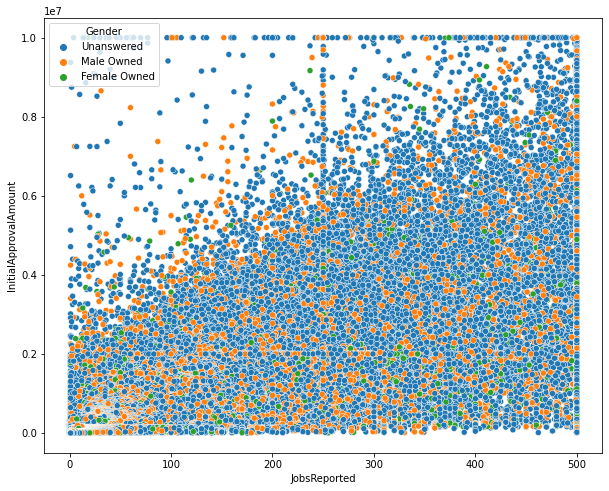

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df ,y = 'InitialApprovalAmount', x = 'JobsReported', hue = 'Gender' );

##### From the above plot we can say that as the JobsReported(Number of Employees) increases loan is also increases.  

#### # Amount of loan given by each lender etc.

In [97]:
lender_wise_loan = df.groupby(['ServicingLenderName'],as_index = False)['InitialApprovalAmount'].sum()

In [98]:
lender_wise_loan.head()

,ServicingLenderName,InitialApprovalAmount
0,"\tFarm Credit Services of Western Arkansas, ACA",20833.33
1,"\tYankee Farm Credit, ACA",10630436.26
2,121 Financial CU,29051350.00
3,1st Advantage Bank,20623549.93
4,1st Advantage FCU,4220556.69


In [94]:
# cross check
s = df[df.ServicingLenderName=='1st Advantage Bank'][['ServicingLenderName','InitialApprovalAmount']]

In [95]:
s['InitialApprovalAmount'].sum() # matches with the inex 3 of lender wise loan

20623549.93

In [100]:
max =lender_wise_loan.InitialApprovalAmount.max()
min =lender_wise_loan.InitialApprovalAmount.min()

In [102]:
lender_wise_loan.loc[lender_wise_loan['InitialApprovalAmount'] == max,'ServicingLenderName'].iloc[0]

'JPMorgan Chase Bank, National Association'

##### JPMorgan Chase Bank, National Association give the highest loan

In [101]:
lender_wise_loan.loc[lender_wise_loan['InitialApprovalAmount'] == min,'ServicingLenderName'].iloc[0]

'1st Liberty FCU'

##### 1st Liberty FCU give the highest loan

In [10]:
df.sample(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
1146153,2242447304,2020-04-29,353,PPP,JAMES T. TRAUTZ JR.,20565 Warburton Bay Square,Sterling,VA,20165,2021-01-09,Paid in Full,24,100,1554.00,1554.00,0.0,Other,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Unanswered,Sterling,LOUDOUN,VA,20165-0001,VA-10,1.0,531210.0,Unanswered,Unknown/NotStated,1.0,1554.00,0.0,0.0,0.0,0.0,0.0,Independent Contractors,122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,N,1563.63,2020-12-15
96766,1628288505,2021-02-19,942,PPS,JM SURLA LLC,431 12th St,Modesto,CA,95354-2401,2021-01-21,Exemption 4,60,100,315063.00,315063.00,0.0,Other,117238,Oak Valley Community Bank,125 N Third Ave,OAKDALE,CA,95361-3039,U,Y,Y,Existing or more than 2 years old,Modesto,STANISLAUS,CA,95354-2401,CA-10,65.0,722511.0,Unanswered,Unknown/NotStated,1.0,315058.00,0.0,0.0,0.0,0.0,0.0,Limited Liability Company(LLC),117238,Oak Valley Community Bank,OAKDALE,CA,Unanswered,Unanswered,N,0.00,2020-11-03
395621,2879688604,2021-03-15,679,PPS,REB TRUCKING LLC,6176 Twin Bridges Rd,Alexandria,LA,71303-7711,2021-09-15,Paid in Full,60,100,190432.65,190432.65,0.0,Other,28221,First National Bank in DeRidder,131 N Washington,DERIDDER,LA,70634-4057,R,N,N,Existing or more than 2 years old,Alexandria,RAPIDES,LA,71303-7711,LA-05,20.0,484110.0,Unanswered,Unknown/NotStated,1.0,190427.65,0.0,0.0,0.0,0.0,0.0,Subchapter S Corporation,28221,First National Bank in DeRidder,DERIDDER,LA,Male Owned,Unanswered,N,191215.54,2021-08-16
665041,2003757709,2020-05-01,235,PPP,"MAYFAIR POWER SYSTEMS, INC.",347 N MAIN ST,FREEPORT,NY,11520,2021-02-18,Paid in Full,24,100,191485.00,191485.00,0.0,Other,48270,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240-2031,U,N,N,Existing or more than 2 years old,FREEPORT,NASSAU,NY,11520-0001,NY-04,120.0,811412.0,Unanswered,Unknown/NotStated,1.0,191485.00,0.0,0.0,0.0,0.0,0.0,Subchapter S Corporation,48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,N,192746.46,2020-12-30
1307826,6513217709,2020-05-01,1013,PPP,CAMPBELL CONSTRUCTION,13867SE 240TH ST,KENT,WA,98042,2021-04-16,Paid in Full,24,100,11589.00,8582.00,0.0,Other,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,KENT,KING,WA,98042-0001,WA-08,2.0,561990.0,Unanswered,Unknown/NotStated,1.0,8582.00,0.0,0.0,0.0,0.0,0.0,Sole Proprietorship,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,N,8263.14,2021-02-25


#### # Highest loan lender in each city.

In [7]:
xx = df.groupby(['BorrowerCity'],as_index=False)['ServicingLenderName','InitialApprovalAmount'].max()
xx.sort_values(by='InitialApprovalAmount',ascending = True).head()

,BorrowerCity,ServicingLenderName,InitialApprovalAmount
18847,NORTHWEST ARTCENTER,"Bank of America, National Association",31.0
879,Alkol,"Capital Plus Financial, LLC",230.0
25125,SW OLYMPIA,"Wells Fargo Bank, National Association",354.0
2877,"Berryville, VA",Bank of Clarke County,500.0
16022,MD SHOHID PATOARY,"Bank of America, National Association",543.0


In [5]:
gc.collect()

0

#### # Number of jobs reported by different business types.

In [6]:
jr_by_bt = df.groupby(['BusinessType'],as_index = False)['JobsReported'].sum()

In [11]:
jr_by_bt.sort_values(by = 'JobsReported', ascending = False)

,BusinessType,JobsReported
5,Corporation,20988909.0
10,Limited Liability Company(LLC),14478468.0
22,Subchapter S Corporation,9266970.0
13,Non-Profit Organization,4544220.0
15,Partnership,961344.0
21,Sole Proprietorship,783408.0
11,Limited Liability Partnership,638018.0
16,Professional Association,341654.0
2,501(c)3 – Non Profit,247089.0
4,Cooperative,132544.0


####  # Average Loan Amount per business type.

In [8]:
avg_ln_bt = df.groupby(['BusinessType'],as_index = False)['InitialApprovalAmount'].mean()

In [17]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [18]:
avg_ln_bt.sort_values(by = 'InitialApprovalAmount', ascending = False)

,BusinessType,InitialApprovalAmount
6,Employee Stock Ownership Plan(ESOP),1394017.4327
2,501(c)3 – Non Profit,994268.3432
24,Tribal Concerns,798165.5318
14,Other,704243.5431
25,Trust,627543.8661
4,Cooperative,580710.3076
13,Non-Profit Organization,551321.1128
11,Limited Liability Partnership,448404.1393
15,Partnership,442311.0340
22,Subchapter S Corporation,425407.0438


In [21]:
df.sample(4)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
39998,5200198303,2021-01-25,914,PPS,CLASSIC WIRE CUT COMPANY INC.,28210 Constellation Rd,Valencia,CA,91355-5000,2021-11-18,Paid in Full,60,100,1999990.0000,1999990.0000,0.0000,Other,249106,"Bank of Southern California, National Association","12265 El Camino Real, Ste 100",SAN DIEGO,CA,92130-4097,U,N,N,Existing or more than 2 years old,Valencia,LOS ANGELES,CA,91355-5000,CA-25,136.0000,339112.0000,Unanswered,Unknown/NotStated,1.0000,1999990.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Corporation,249106,"Bank of Southern California, National Association",SAN DIEGO,CA,Unanswered,Unanswered,N,2013962.5300,2021-10-25
1008561,5116247208,2020-04-27,304,PPP,"SHILOH FARMS, LLC",13610 Shiloh Dr.,WINDSOR,VA,23487-5829,2021-07-15,Paid in Full,24,100,5600.0000,30500.0000,0.0000,Other,74173,Farmers Bank,50 E Windsor Blvd,WINDSOR,VA,23487-9442,R,N,N,Existing or more than 2 years old,WINDSOR,ISLE OF WIGHT,VA,23487-5829,VA-03,1.0000,111998.0000,Unanswered,Unknown/NotStated,1.0000,30500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Limited Liability Company(LLC),74173,Farmers Bank,WINDSOR,VA,Unanswered,Unanswered,N,30861.7600,2021-06-30
1344958,8221427002,2020-04-08,563,PPP,WINGRA LEASING LLC,2975 KAPEC ROAD,FITCHBURG,WI,53719-5009,2021-03-06,Paid in Full,24,100,146000.0000,146000.0000,0.0000,Other,452244,Settlers Bank,4021 Meridian Dr,DE FOREST,WI,53598-9698,U,N,N,Existing or more than 2 years old,FITCHBURG,DANE,WI,53719-5009,WI-02,12.0000,532412.0000,Unanswered,Unknown/NotStated,18250.0000,109500.0000,0.0000,18250.0000,0.0000,0.0000,0.0000,Limited Liability Company(LLC),452244,Settlers Bank,DE FOREST,WI,Unanswered,Unanswered,N,147160.0000,2021-02-02
888185,8943268305,2021-01-30,883,PPS,DYNAMIC BLENDING SPECIALISTS INC,523 E 1750 N Ste 100,Vineyard,UT,84059-8109,2021-09-15,Paid in Full,60,100,794050.4500,794050.4500,0.0000,Other,72790,Central Bank,75 N University Ave,PROVO,UT,84601-4429,U,N,N,Existing or more than 2 years old,Vineyard,UTAH,UT,84059-8109,UT-03,61.0000,339999.0000,Unanswered,Not Hispanic or Latino,1.0000,794048.4500,0.0000,0.0000,0.0000,0.0000,0.0000,Subchapter S Corporation,72790,Central Bank,PROVO,UT,Male Owned,Non-Veteran,N,798597.2000,2021-08-31


#### # loan amounts of Male Owned businesses VS FemaleOwned businesses

In [23]:
ln_amount_mf = df.groupby(['Gender'],as_index = False)['InitialApprovalAmount'].mean()
ln_amount_mf

,Gender,InitialApprovalAmount
0,Female Owned,216248.6644
1,Male Owned,337933.7260
2,Unanswered,358404.7470


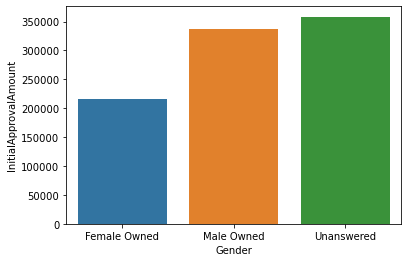

In [31]:
sns.barplot(data = ln_amount_mf ,x='Gender',y='InitialApprovalAmount');

##### from above graph we can say that Male Owned businesses is higher than the Female Owned businesses 

In [34]:
ln_amount_mf_sum = df.groupby(['Gender'],as_index = False)['InitialApprovalAmount'].sum()
ln_amount_mf_sum

,Gender,InitialApprovalAmount
0,Female Owned,31707244165.0250
1,Male Owned,153639540911.7350
2,Unanswered,346621832548.6290


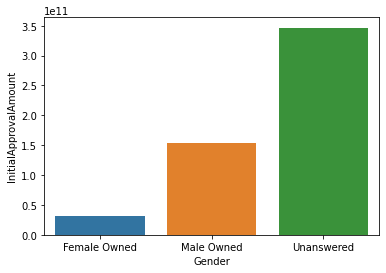

In [35]:
sns.barplot(data = ln_amount_mf_sum ,x='Gender',y='InitialApprovalAmount');

##### From above plot we can say that the  Male Owned businesses have the more loan amount than  Female Owned businesses

#### # months in which high amount of loans were sanctioned.

In [36]:
df.sample(4)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
15185,6612707208,2020-04-28,669,PPP,"BRAD HENDRICKS, P.A.",500-C PLEASANT VALLEY DR,LITTLE ROCK,AR,72227-2137,2021-04-20,Paid in Full,24,100,459900.0000,459900.0000,0.0000,Other,4641,First National Bank,200 W Court St,PARAGOULD,AR,72450-4338,U,N,N,Existing or more than 2 years old,LITTLE ROCK,PULASKI,AR,72227-2137,AR-02,28.0000,541110.0000,Unanswered,Unknown/NotStated,12000.0000,367900.0000,0.0000,80000.0000,0.0000,0.0000,0.0000,Corporation,4641,First National Bank,PARAGOULD,AR,Unanswered,Unanswered,N,463969.8000,2021-03-24
52449,7680837208,2020-04-28,942,PPP,MARKON COOPERATIVE,1023 S MAIN ST,SALINAS,CA,93901,2021-04-20,Paid in Full,24,100,900287.0000,900287.0000,0.0000,Other,6042,Mechanics Bank,1111 Civic Dr,WALNUT CREEK,CA,94596-3895,U,Y,N,Existing or more than 2 years old,SALINAS,MONTEREY,CA,93901-1000,CA-20,40.0000,424480.0000,Unanswered,Unknown/NotStated,1.0000,900287.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Trust,6042,Mechanics Bank,WALNUT CREEK,CA,Unanswered,Unanswered,N,908589.6500,2021-04-02
352739,8145227009,2020-04-08,562,PPP,"SUMMIT HEARTLAND, LLC",3823 W 1800 S,REMINGTON,IN,47977-8831,2021-02-19,Paid in Full,24,100,1000732.0000,1000732.0000,0.0000,Other,24037,First Merchants Bank,200 E Jackson St,MUNCIE,IN,47305-2835,R,N,N,Existing or more than 2 years old,REMINGTON,JASPER,IN,47977-8831,IN-04,46.0000,236220.0000,Unanswered,Unknown/NotStated,1.0000,1000732.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Limited Liability Company(LLC),24037,First Merchants Bank,MUNCIE,IN,Unanswered,Unanswered,N,1008025.0100,2021-01-08
251249,1914017706,2020-05-01,491,PPP,OCEAN BREEZE BAR &AMP; GRILL LLC,521 FLAGLER AVE,NEW SMYRNA BEACH,FL,32169,2021-08-20,Paid in Full,24,100,193450.0000,193450.0000,0.0000,Other,48270,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240-2031,U,N,N,Existing or more than 2 years old,NEW SMYRNA BEACH,VOLUSIA,FL,32169-0001,FL-06,59.0000,722410.0000,Unanswered,Unknown/NotStated,4500.0000,163950.0000,0.0000,25000.0000,0.0000,0.0000,0.0000,Limited Liability Company(LLC),48270,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,N,195724.9700,2021-07-08


In [45]:
pd.DatetimeIndex(df.DateApproved).month

Int64Index([5, 5, 5, 5, 5, 8, 4, 8, 4, 4,
            ...
            3, 4, 1, 5, 4, 5, 3, 5, 3, 3],
           dtype='int64', name='DateApproved', length=1568392)

In [50]:
x = df.loc[df.InitialApprovalAmount == 10000000.0000,'DateApproved']

In [54]:
pd.DatetimeIndex(x).month.unique()

Int64Index([4, 5, 3, 2, 1, 7, 8, 6], dtype='int64', name='DateApproved')

##### [4, 5, 3, 2, 1, 7, 8, 6] are the months in which high amount of loans were sanctioned.

In [55]:
df.LoanNumber.nunique()

1568392

In [56]:
df.shape

(1568392, 53)

In [57]:
df.BorrowerName.nunique()

1363120

In [72]:
pd.DatetimeIndex(df.DateApproved).month.unique().sort_values()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64', name='DateApproved')

In [83]:
x_1 = df.loc[(pd.DatetimeIndex(df.DateApproved).month == 1) ,['DateApproved','JobsReported']]

In [76]:
x_1.shape

(153945, 2)

In [77]:
x_1.sample(3)

,DateApproved,JobsReported
1297113,2021-01-25,3.0000
1270259,2021-01-31,2.0000
1550143,2021-01-29,5.0000


In [88]:
pd.DatetimeIndex(x_1.DateApproved).year.unique()

Int64Index([2021], dtype='int64', name='DateApproved')

In [79]:
x_2 = df.loc[pd.DatetimeIndex(df.DateApproved).month == 2 ,['DateApproved','JobsReported']]

In [80]:
x_2.shape

(178983, 2)

In [89]:
pd.DatetimeIndex(x_2.DateApproved).year.unique()

Int64Index([2021], dtype='int64', name='DateApproved')

In [81]:
x_2.head()

,DateApproved,JobsReported
75,2021-02-20,92.0000
77,2021-02-05,150.0000
81,2021-02-10,226.0000
89,2021-02-12,221.0000
97,2021-02-07,199.0000


In [7]:
gc.collect()

0

#### # number of loans approved in each month

In [90]:
df.sample(3)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
1455034,5972068506,2021-03-02,563,PPP,PAUL COX,525 Cornelia St,Janesville,WI,53545-2415,2021-09-24,Paid in Full,60,100,12000.0000,12000.0000,0.0000,Other,317954,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042,U,N,Y,Existing or more than 2 years old,Janesville,ROCK,WI,53545-2415,WI-01,1.0000,711510.0000,Unanswered,Unknown/NotStated,1.0000,11999.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Sole Proprietorship,317954,"Newtek Small Business Finance, Inc.",LAKE SUCCESS,NY,Unanswered,Unanswered,N,12045.0000,2021-08-02
1495924,8125917203,2020-04-28,563,PPP,JULES PILATES LLC,2160 ATWOOD AVE,MADISON,WI,53704,2021-02-12,Paid in Full,24,100,4131.0000,4131.0000,0.0000,Other,108074,Summit CU,1709 Landmark Dr,COTTAGE GROVE,WI,53527-8957,U,N,N,Existing or more than 2 years old,MADISON,DANE,WI,53704-0001,WI-02,1.0000,713940.0000,Unanswered,Unknown/NotStated,1.0000,4131.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Limited Liability Company(LLC),108074,Summit CU,COTTAGE GROVE,WI,Female Owned,Non-Veteran,N,4160.9900,2021-01-26
16573,5365427008,2020-04-05,669,PPP,WEND-XX INC,2901 ARKANSAS BLVD,TEXARKANA,AR,71854-2535,2021-01-22,Paid in Full,24,100,276400.0000,276400.0000,0.0000,Wendy's,4803,Commercial National Bank of Texarkana,5515 Summerhill Rd,TEXARKANA,TX,75503-1821,R,N,N,Existing or more than 2 years old,TEXARKANA,MILLER,AR,71854-2535,AR-04,73.0000,722513.0000,Unanswered,Not Hispanic or Latino,1.0000,276400.0000,0.0000,0.0000,0.0000,0.0000,0.0000,Subchapter S Corporation,4803,Commercial National Bank of Texarkana,TEXARKANA,TX,Female Owned,Unanswered,N,278227.3100,2020-12-09


In [8]:
df.shape

(1568392, 53)

In [93]:
df.LoanNumber.nunique()    

1568392

In [95]:
# All the loanNumbers are unique

In [32]:
ln_approved_each_month = pd.DataFrame(df.DateApproved.value_counts()).sort_index()

In [33]:
ln_approved_each_month.reset_index(level = 0, inplace = True)

In [34]:
ln_approved_each_month.sample()

,index,DateApproved
106,2020-07-30,1061


In [35]:
ln_approved_each_month.rename(columns = {'index':'DateApproved','DateApproved':'loans_approved'},inplace = True)

In [37]:
ln_approved_each_month

,DateApproved,loans_approved
0,2020-04-03,10548
1,2020-04-04,18432
2,2020-04-05,21795
3,2020-04-06,31955
4,2020-04-07,43761
5,2020-04-08,41315
6,2020-04-09,45175
7,2020-04-10,47031
8,2020-04-11,35641
9,2020-04-12,16146


In [38]:
ln_approved_each_month.DateApproved=pd.to_datetime(ln_approved_each_month.DateApproved,errors='coerce')

In [39]:
ln_approved_each_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateApproved    244 non-null    datetime64[ns]
 1   loans_approved  244 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [41]:
ln_approved_each_month.to_csv('df_daywise.csv')

In [21]:
ln_approved_each_month['DateApproved'] = ln_approved_each_month['DateApproved'].dt.strftime('%Y-%m')

In [22]:
ln_approved_each_month.head()

,DateApproved,loans_approved
0,2020-04,10548
1,2020-04,18432
2,2020-04,21795
3,2020-04,31955
4,2020-04,43761


In [25]:
data_ts = pd.DataFrame(ln_approved_each_month.groupby('DateApproved')['loans_approved'].sum())

In [27]:
data_ts

,loans_approved
DateApproved,
2020-04,723296
2020-05,172086
2020-06,35059
2020-07,15353
2020-08,8392
2020-12,4
2021-01,153945
2021-02,178983
2021-03,146550


In [28]:
data_ts.to_csv('data_ts.csv')